# <center> 🚀**Spaceship Titanic**🚀 </center>



# Table of Contents
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Libraries](#2)
- [3. Data Loading](#3)
  - [3.1 Column Descriptions](#3.1)
  - [3.2 Data Overview](#3.2)
- [4. Exploratory Data Analysis (EDA)](#4)
- [5. Feature Engineering](#5)    
- [6. Missing Values](#6)
- [7. Preprocessing](#7)
- [8. Model Selection](#8) 

<a id="1"></a>
# 1. Introduction

This Spaceship Titanic dataset challenge is a binary classification problem. Predicting if a passenger was sent to another dimension during the Spaceship Titanic's crash with a spacetime anomaly is the objective. Submissions are assessed on Classification Accuracy.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>





<a id="2"></a>
# 2. Libraries

In [1]:
from IPython.display import clear_output
!pip3 install -U lazypredict
!pip3 install -U pandas #Upgrading pandas
!pip install eli5
!pip install catboost
clear_output()

# Check the offical Documentation of LazyPredict here : https://lazypredict.readthedocs.io

In [2]:
# Core
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'darkgrid',font_scale = 1.2)
sns.set_palette('Set2')
import itertools
from termcolor import colored
import time
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, confusion_matrix, recall_score, precision_score, f1_score,
                              roc_auc_score,plot_confusion_matrix,plot_roc_curve,roc_curve)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import eli5 # helps to debug machine learning classifiers and explain their predictions.
from eli5.sklearn import PermutationImportance
from sklearn.utils import resample



# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

import lazypredict
from lazypredict.Supervised import LazyClassifier




<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# 3. Data Loading 

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Othercomputers/My laptop/Kaggle Competitions/Spaceship Titanic

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Othercomputers/My laptop/Kaggle Competitions/Spaceship Titanic


In [4]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

print('Train set shape:', train.shape)
print('Test set shape:', test.shape)
train.head()

Train set shape: (8693, 14)
Test set shape: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


<a id="3.1"></a>
##  **Column Descriptions** 

- `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- `Destination` - The planet the passenger will be debarking to.
- `Age` - The age of the passenger.
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name` - The first and last names of the passenger.
- `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.



<a id="3.2"></a>
##  **Data Overview** 

In [5]:
# for interactive tables 
%load_ext google.colab.data_table

# to disable interactive tables
#%unload_ext google.colab.data_table 

In [6]:
train

Output hidden; open in https://colab.research.google.com to view.

**Missing Values**

In [7]:
print('TRAIN SET MISSING VALUES:')
print(train.isna().sum().sort_values(ascending = False))
print('')
print('TEST SET MISSING VALUES:')
print(test.isna().sum().sort_values(ascending = False))

TRAIN SET MISSING VALUES:
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

TEST SET MISSING VALUES:
FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64


Almost every feature has missing values. How we deal with this is important.

**Duplicates**

In [8]:
print(f'Duplicates in train set: {train.duplicated().sum()}, ({np.round(100*train.duplicated().sum()/len(train),1)}%)')
print(f'Duplicates in test set: {test.duplicated().sum()}, ({np.round(100*test.duplicated().sum()/len(test),1)}%)')

Duplicates in train set: 0, (0.0%)
Duplicates in test set: 0, (0.0%)


**Cardinality of Features**

There are 6 continuous features, 4 categorical features (excluding the target) and 3 descriptive/qualitative features.

In [9]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

**Data Types**

In [10]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

We will need to transform the data to be numeric (int64 or float64) so that we can train machine learning models.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# 4. Exploratory Data Analysis (EDA)

## **Target Distribution**


In [11]:
TARGET = 'Transported'
FEATURES = [col for col in train.columns if col != TARGET]

Text(0.5, 1.0, 'Target distribution')

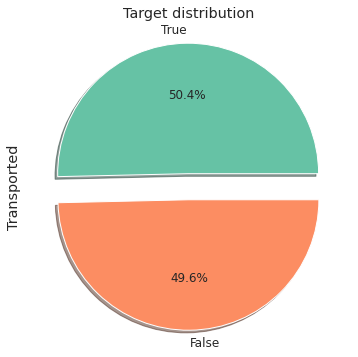

In [12]:
plt.figure(figsize=(6,6))
train[TARGET].value_counts().plot.pie(explode=[0.1,0.1], 
                                             autopct='%1.1f%%', 
                                             shadow=True, 
                                             textprops={'fontsize':12}).set_title("Target distribution")

The target variable is highly balanced, so we can use the `accuracy`as a valid metric and do not have to consider techniques like under/over-sampling.

## **Continuos Features**

In [13]:
text_features = ["Cabin", "Name"]
cat_features = [col for col in FEATURES if train[col].nunique() < 25 and col not in text_features ]
cont_features = [col for col in FEATURES if train[col].nunique() >= 25 and col not in text_features ]

cont_features.pop(0)

'PassengerId'

**Age**

Text(0, 0.5, 'Age')

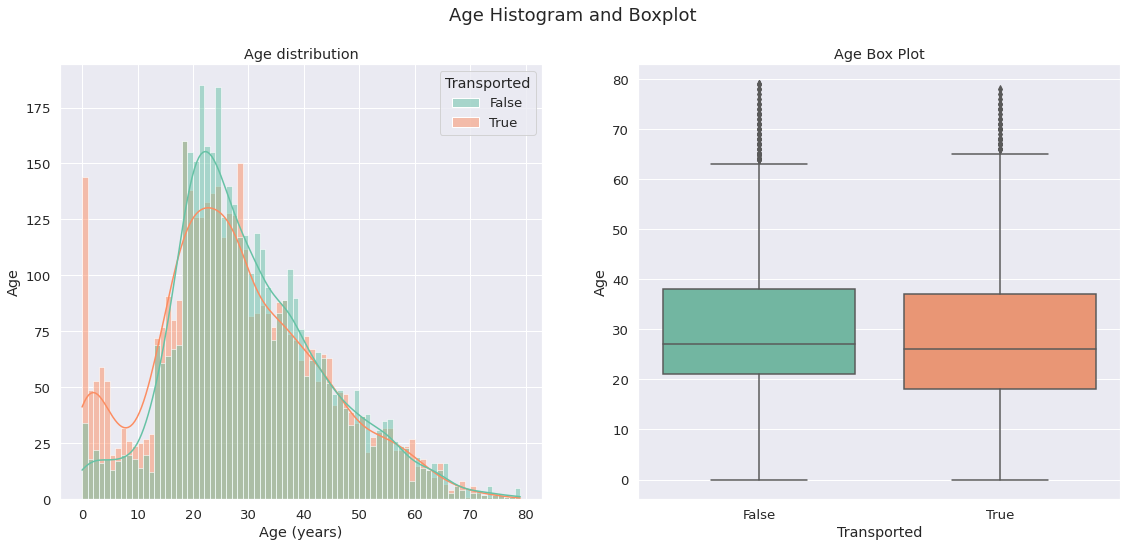

In [14]:
#plt.figure(figsize=(10,4))
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(19, 8))
fig.suptitle('Age Histogram and Boxplot', size=18)

sns.histplot(data=train, x='Age', hue=TARGET, binwidth=1, kde=True,ax =ax1)
ax1.set_title('Age distribution')
ax1.set_xlabel('Age (years)')

sns.boxplot(data = train, x = TARGET,y = 'Age',ax = ax2)
ax2.set_title('Age Box Plot')
ax2.set_xlabel('Transported')
ax1.set_ylabel('Age')

In [15]:
transported_1 = train[train[TARGET]==True]['Age']
transported_0 = train[train[TARGET]==False]['Age']

print(colored("Age Min, Mean and Max:", 'magenta', attrs=['underline', 'bold']))
print(colored("\tTransported == 1", 'green', attrs=['bold']))
print('\tAge Minimum: ', colored(transported_1.describe()['min'], "cyan", attrs=['bold']))
print('\tAge Mean:', colored(transported_1.describe()['mean'].round(2), "cyan", attrs=['bold']))
print('\tAge Maximum:', colored(transported_1.describe()['max'], "cyan", attrs=['bold']), '\n')

print(colored("\tTransported == 0", 'green', attrs=['bold']))
print('\tAge Minimum: ', colored(transported_0.describe()['min'], "cyan", attrs=['bold']))
print('\tAge Mean:', colored(transported_0.describe()['mean'].round(2), "cyan", attrs=['bold']))
print('\tAge Maximum:', colored(transported_0.describe()['max'], "cyan", attrs=['bold']))

Age Min, Mean and Max:
	Transported == 1
	Age Minimum:  0.0
	Age Mean: 27.75
	Age Maximum: 78.0 

	Transported == 0
	Age Minimum:  0.0
	Age Mean: 29.92
	Age Maximum: 79.0


 👀 **Insights**  👀
* Based on the boxplot, younger passengers are more likely of being Transported.
* Looking at the histogram we can see that: 
  * Passengers up to 18 years old were **more** likely to be transported than not.
  * Passengers 18-25 year olds were **less** likely to be transported than not.
  * Passengers over 25 year olds were about **equally** likely to be transported than not.

> 💡 Create a new feature that indicates whether the passanger is a child, adolescent or adult.

**Expenditure Features**

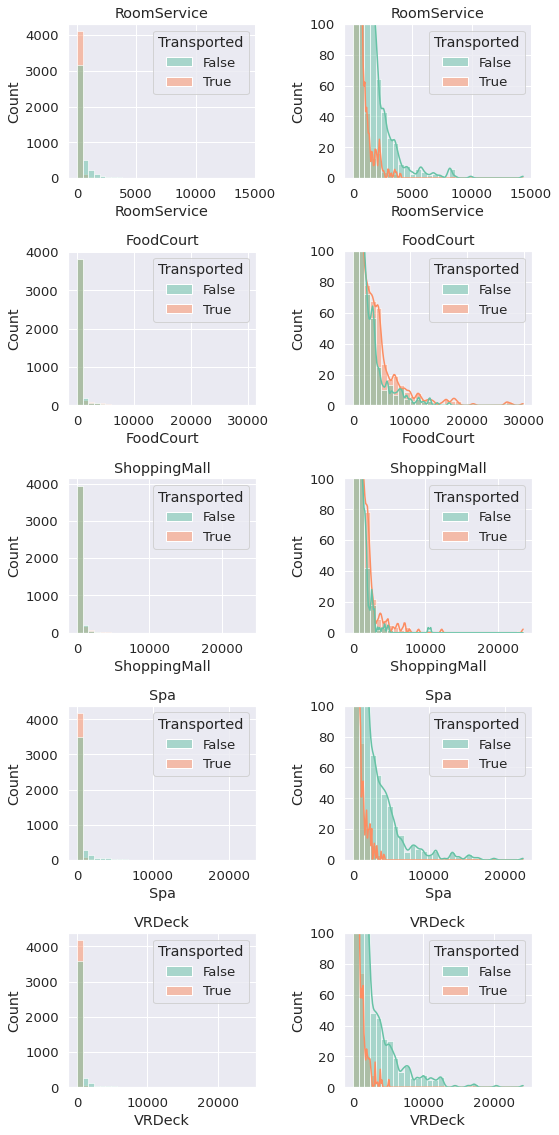

In [16]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


fig=plt.figure(figsize=(8,16))
for i, var in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train, x=var, axes=ax, bins=30, kde=False, hue=TARGET)
    ax.set_title(var)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=var, axes=ax, bins=30, kde=True, hue=TARGET)
    plt.ylim([0,100])
    ax.set_title(var)
fig.tight_layout()  
plt.show()

 👀 **Insights**  👀
* From the plots on the left we can see that the majority of the people didn't spend any money.
* From the plots on the right, we can see that the distribution of spending decays exponentially.
* There are not many outliers.
* Those that were transported tended to spend less.
RoomService, Spa, and VRDeck (luxury expenditures) are distributed differently than FoodCourt and ShoppingMall (basic expenditures)

> 💡 
1. Create a new feature that monitors the overall cost of all five facilities.
2. Create a binary feature to indicate whether or not the individual has spent anything. (That is, the total spending is 0).
3. To decrease skew, use the log transform. 

## **Categorical Features**

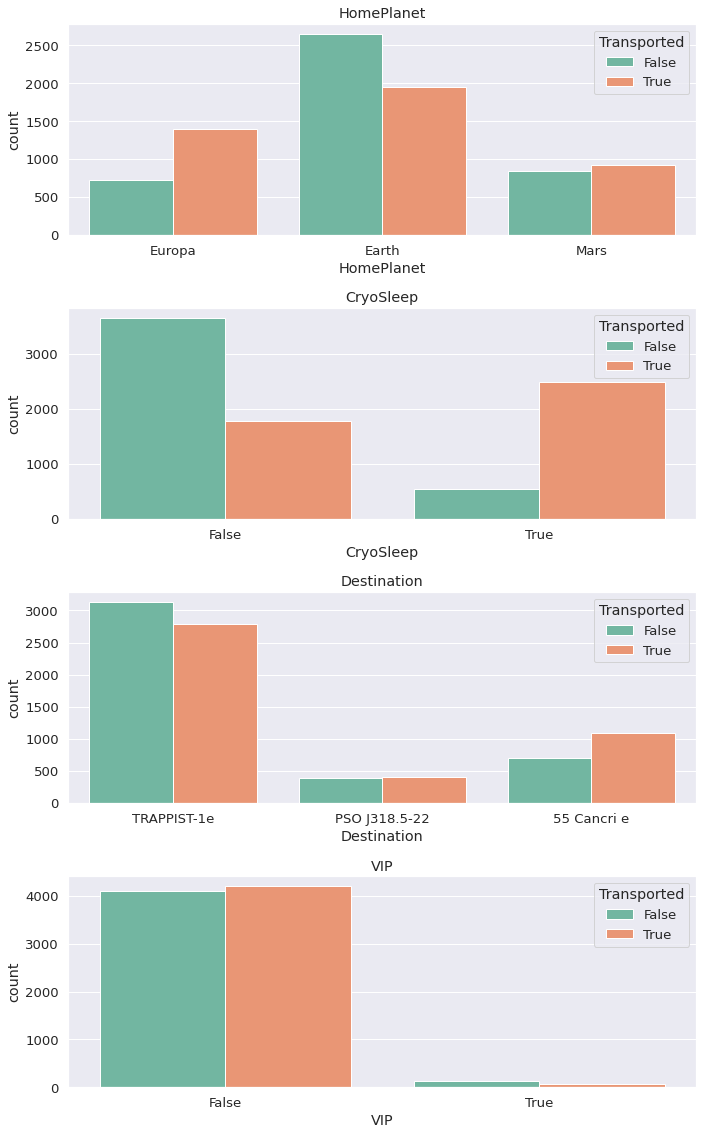

In [17]:
# Plot categorical features
fig=plt.figure(figsize=(10,16))
sns.set_palette('Set2')
for i, var_name in enumerate(cat_features):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

 👀 **Insights**  👀
* There appears to be a greater likelihood of passengers that departed from (or from) Europe and Mars than passengers that departed from (or from) Earth.
* CyroSleep seems to be a very useful feature as it is highly positively correlated with Transported - i.e. those that were confined in their cabines were more likely to be transported.
* Based on the plot, the planet where the passenger was debarking to/going, we cansee that the destination `TRAPPIST-1e` has a negative correlation with Transported- therefore less likely to be transported. On the other hand, the other two destinations exhibit a positive corelation with passengers, being `55 Cancri e`the strongest one.
* Given that the target split is essentially equal, VIP does not seem to be a beneficial feature. In essence, it is false that VIP passengers have a higher chance of being transported.



> 💡 We might consider dropping the VIP column to prevent overfitting.

## **Text Features**

We can't plot this data (yet). We need to transform it into more useful features.

In [18]:
# textitative features
text_feats=['PassengerId', 'Cabin' ,'Name']

# Preview textitative features
train[text_feats].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines



 👀 **Insights**  👀
* PassengerId has the format gggg pp, where gggg represents the group the passenger is traveling with and pp represents their position inside the group. 
* Cabin is written as deck/num/side, where side might be P for Port or S for Starboard.

> 💡
* The PassengerId feature allows us to extract the group and group size.
* The cabin function allows us to extract the deck, number, and side. 
* To identify families, we might extract the surname from the name feature.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a>
# 5. Feature Engineering

**Age status**

Bin age feature into groups. This will be helpful for filling missing values like expenditure according to age.

In [25]:
def bin_age(temp):
  temp = temp.copy()
  temp['Age_group']=np.nan
  temp.loc[temp['Age']<=12,'Age_group']='Age_0-12'
  temp.loc[(temp['Age']>12) & (temp['Age']<18),'Age_group']='Age_13-17'
  temp.loc[(temp['Age']>=18) & (temp['Age']<=25),'Age_group']='Age_18-25'
  temp.loc[(temp['Age']>25) & (temp['Age']<=30),'Age_group']='Age_26-30'
  temp.loc[(temp['Age']>30) & (temp['Age']<=50),'Age_group']='Age_31-50'
  temp.loc[temp['Age']>50,'Age_group']='Age_51+'
  
  return temp

train = bin_age(train)
test = bin_age(test)


In [24]:
# def get_age_bins(temp):
#   bins =  [0,17,25,30,50,80],
#   labels =['Age_0_17','Age_18_25','Age_26_30', 'Age_31_50','Age_51+']
#   return pd.cut(temp, bins= bins, labels= labels,include_lowest = True,ordered = True)
                                  

In [23]:
# df_ages['age_bin'] = pd.cut(x = df_ages['Age'],bins = [0,17,25,30,50,80],
#                             labels =['Age_0_17',
#                                      'Age_18_25',
#                                      'Age_26_30',
#                                      'Age_31_50',
#                                      'Age_51+'],include_lowest = True,
#                             precision = 0,
#                             ordered = True
#                             ).astype('str')

Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 1.0, 'Age group distribution')

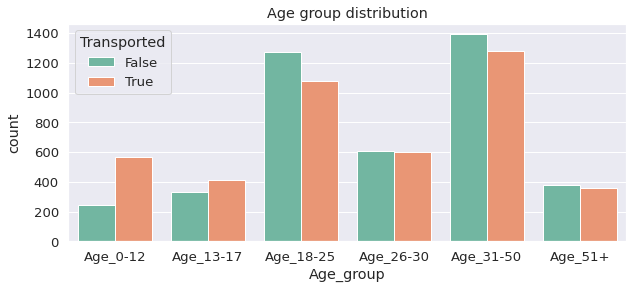

In [26]:
# Plot distribution of new features
plt.figure(figsize=(10,4))
g=sns.countplot(data=train, x='Age_group', hue='Transported', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')

In [27]:
# df_ages['age_bin'] = pd.cut(x = df_ages['Age'],bins = [0,17,25,30,50,80],
#                             labels =['Age_0_17',
#                                      'Age_18_25',
#                                      'Age_26_30',
#                                      'Age_31_50',
#                                      'Age_51+'],include_lowest = True,
#                             precision = 0,
#                             ordered = True
#                             ).astype('str')

**Expenditure**

Add feature calculating the total expenditue and feature identifying if no spending.

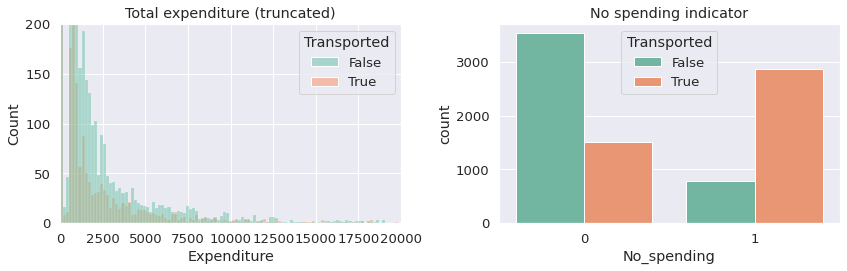

In [28]:
# New features - training set
train['Expenditure']=train[exp_feats].sum(axis=1)
train['No_spending']=(train['Expenditure']==0).astype(int)

# New features - test set
test['Expenditure']=test[exp_feats].sum(axis=1)
test['No_spending']=(test['Expenditure']==0).astype(int)

# Plot distribution of new features
fig=plt.figure(figsize=(12,4))
sns.set_palette('Set2')
plt.subplot(1,2,1)
sns.histplot(data=train, x='Expenditure', hue=TARGET, bins=200)
plt.title('Total expenditure (truncated)')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=train, x='No_spending', hue=TARGET)
plt.title('No spending indicator')
fig.tight_layout()

**Passenger group**

Extract passenger group and group size from PassengerId.

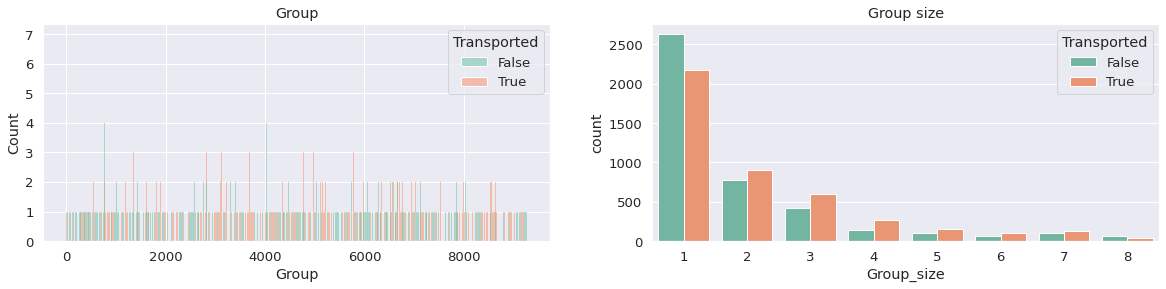

In [29]:
# New feature - Group
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

# New feature - Group size
train['Group_size']=train['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])
test['Group_size']=test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])

# Plot distribution of new features
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=train, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=train, x='Group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout()

We can't really use the Group feature in our models because it has too big of a cardinality (6217) and would explode the number of dimensions with one-hot encoding.

The Group size on the other hand should be a useful feature. In fact, we can compress the feature further by creating a 'Solo' column that tracks whether someone is travelling on their own or not. The figure on the right shows that group size=1 is less likely to be transported than group size>1.

(0.0, 3000.0)

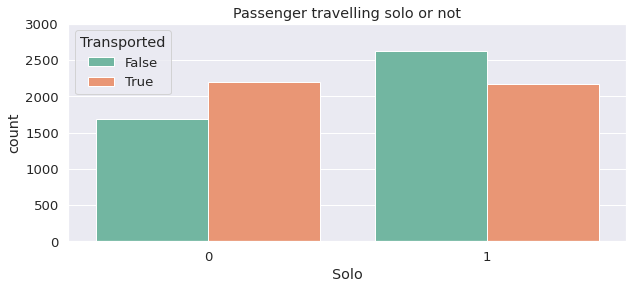

In [30]:
# New feature
train['Solo']=(train['Group_size']==1).astype(int)
test['Solo']=(test['Group_size']==1).astype(int)

# New feature distribution
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

**Cabin location**

Extract deck, number and side from cabin feature.

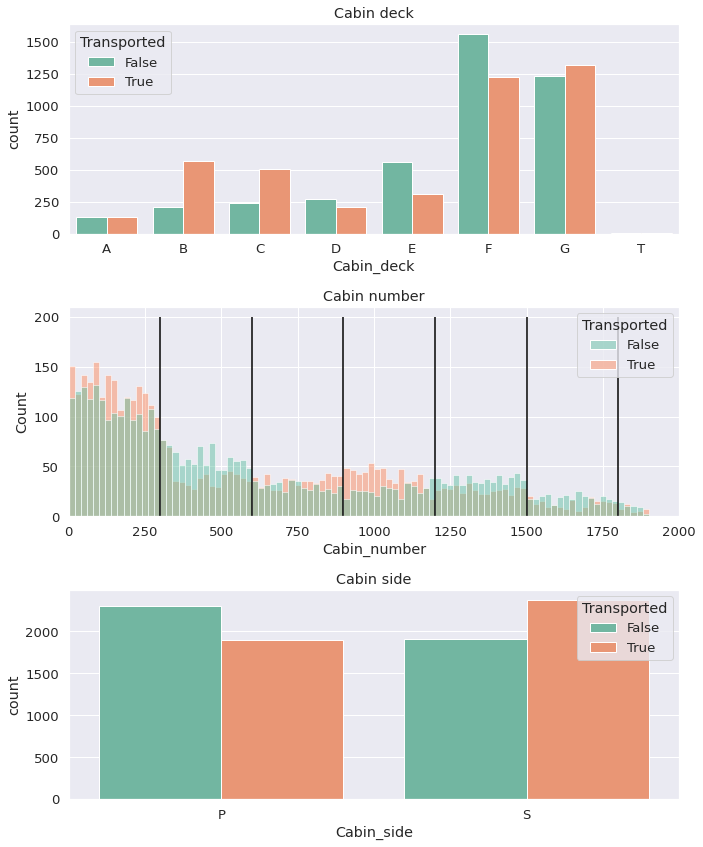

In [31]:
# Replace NaN's with outliers for now (so we can split feature)
train['Cabin'].fillna('Z/9999/Z', inplace=True)
test['Cabin'].fillna('Z/9999/Z', inplace=True)

# New features - training set
train['Cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['Cabin_number'] = train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])

# New features - test set
test['Cabin_deck'] = test['Cabin'].apply(lambda x: x.split('/')[0])
test['Cabin_number'] = test['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
test['Cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])

# Put Nan's back in (we will fill these later)
train.loc[train['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
train.loc[train['Cabin_number']==9999, 'Cabin_number']=np.nan
train.loc[train['Cabin_side']=='Z', 'Cabin_side']=np.nan
test.loc[test['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
test.loc[test['Cabin_number']==9999, 'Cabin_number']=np.nan
test.loc[test['Cabin_side']=='Z', 'Cabin_side']=np.nan

# Drop Cabin (we don't need it anymore)
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

# Plot distribution of new features
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=train, x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=train, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

*This is interesting!* It appears that Cabin_number is grouped into chunks of 300 cabins. This means we can compress this feature into a categorical one, which indicates which chunk each passenger is in.

*Other notes:* The cabin deck 'T' seems to be an outlier (there are only 5 samples).

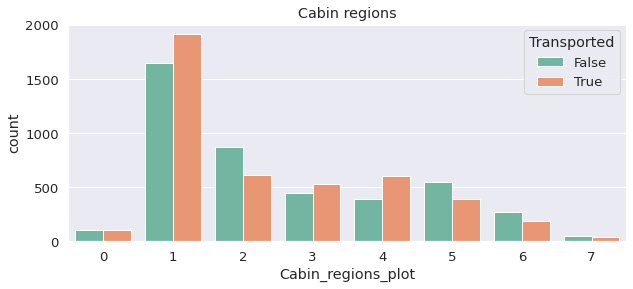

In [32]:
# New features - training set
train['Cabin_region1']=(train['Cabin_number']<300).astype(int)   # one-hot encoding
train['Cabin_region2']=((train['Cabin_number']>=300) & (train['Cabin_number']<600)).astype(int)
train['Cabin_region3']=((train['Cabin_number']>=600) & (train['Cabin_number']<900)).astype(int)
train['Cabin_region4']=((train['Cabin_number']>=900) & (train['Cabin_number']<1200)).astype(int)
train['Cabin_region5']=((train['Cabin_number']>=1200) & (train['Cabin_number']<1500)).astype(int)
train['Cabin_region6']=((train['Cabin_number']>=1500) & (train['Cabin_number']<1800)).astype(int)
train['Cabin_region7']=(train['Cabin_number']>=1800).astype(int)

# New features - test set
test['Cabin_region1']=(test['Cabin_number']<300).astype(int)   # one-hot encoding
test['Cabin_region2']=((test['Cabin_number']>=300) & (test['Cabin_number']<600)).astype(int)
test['Cabin_region3']=((test['Cabin_number']>=600) & (test['Cabin_number']<900)).astype(int)
test['Cabin_region4']=((test['Cabin_number']>=900) & (test['Cabin_number']<1200)).astype(int)
test['Cabin_region5']=((test['Cabin_number']>=1200) & (test['Cabin_number']<1500)).astype(int)
test['Cabin_region6']=((test['Cabin_number']>=1500) & (test['Cabin_number']<1800)).astype(int)
test['Cabin_region7']=(test['Cabin_number']>=1800).astype(int)

# Plot distribution of new features
plt.figure(figsize=(10,4))
train['Cabin_regions_plot']=(train['Cabin_region1']+2*train['Cabin_region2']+3*train['Cabin_region3']+4*train['Cabin_region4']+5*train['Cabin_region5']+6*train['Cabin_region6']+7*train['Cabin_region7']).astype(int)
sns.countplot(data=train, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
train.drop('Cabin_regions_plot', axis=1, inplace=True)

**Last name**

Calculate family size from last name.

Text(0.5, 1.0, 'Family size')

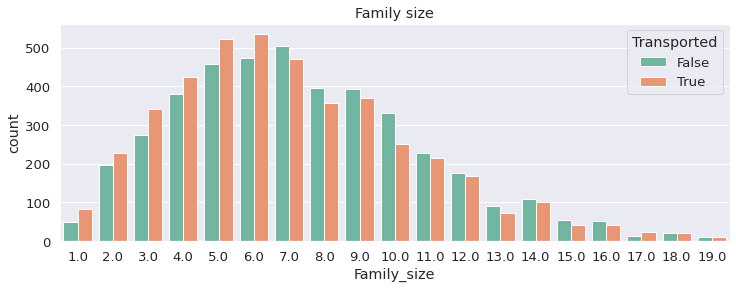

In [33]:
# Replace NaN's with outliers for now (so we can split feature)
train['Name'].fillna('Unknown Unknown', inplace=True)
test['Name'].fillna('Unknown Unknown', inplace=True)

# New feature - Surname
train['Surname']=train['Name'].str.split().str[-1]
test['Surname']=test['Name'].str.split().str[-1]

# New feature - Family size
train['Family_size']=train['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])
test['Family_size']=test['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])

# Put Nan's back in (we will fill these later)
train.loc[train['Surname']=='Unknown','Surname']=np.nan
train.loc[train['Family_size']>100,'Family_size']=np.nan
test.loc[test['Surname']=='Unknown','Surname']=np.nan
test.loc[test['Family_size']>100,'Family_size']=np.nan

# Drop name (we don't need it anymore)
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

# New feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=train, x='Family_size', hue='Transported')
plt.title('Family size')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
# 6. Missing values

**Combine train and test**

This will make it easier to fill missing values. We will split it back later.

In [34]:
# Labels and features
y=train['Transported'].copy().astype(int)
X=train.drop('Transported', axis=1).copy()

# Concatenate dataframes
data=pd.concat([X, test], axis=0).reset_index(drop=True)

**Explore missing values**

In [35]:
# Columns with missing values
na_cols=data.columns[data.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,288,2.22
CryoSleep,310,2.39
Destination,274,2.11
Age,270,2.08
VIP,296,2.28
RoomService,263,2.03
FoodCourt,289,2.23
ShoppingMall,306,2.36
Spa,284,2.19
VRDeck,268,2.07


Text(0.5, 1.0, 'Heatmap of missing values')

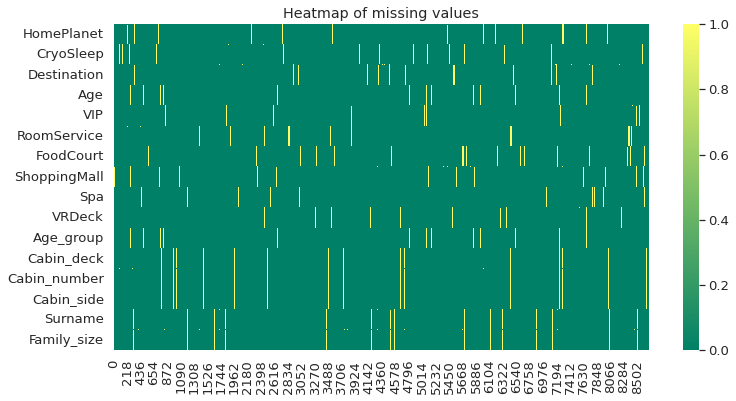

In [36]:
# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(train[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

Missing values make up about 2% of the data, which is a relatively small amount. For the most part, they don't seem to be happening at the same time (except the features made from splitting Cabin and Name), but let's inspect closer.

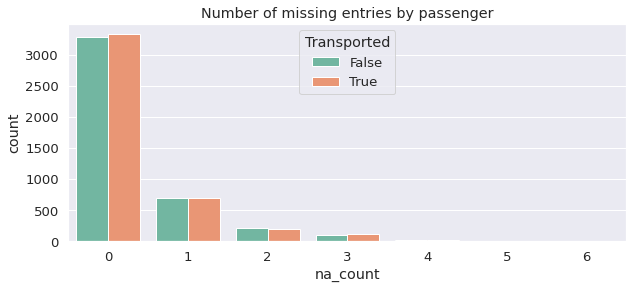

In [37]:
# Countplot of number of missing values by passenger
train['na_count']=train.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
train.drop('na_count', axis=1, inplace=True)

*Notes:*
* Missing values are independent of the target and for the most part are isolated. 
* Even though only 2% of the data is missing, about 25% of all passengers have at least 1 missing value.
* PassengerId is the only (original) feature to not have any missing values. 


*Insight:*
* Since most of the missing values are isolated it makes sense to try to fill these in as opposed to just dropping rows.
* If there is a relationship between PassengerId and other features we can fill missing values according to this column.

**Strategy**

The **easiest** way to deal with missing values is to just use the **median** for continuous features and the **mode** for categorical features (see version 20 of this notebook). This will work 'well enough' but if we want to maximise the accuracy of our models then we need to look for patterns within the missing data. The way to do this is by looking at the **joint distribution** of features, e.g. do passengers from the same group tend to come from the same family? There are obviously many combinations so we will just summarise the useful trends I and others have found.

**HomePlanet and Group**

In [38]:
# Joint distribution of Group and HomePlanet
GHP_gb=data.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
GHP_gb.head()

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.00,1.00,0.00
2,1.00,0.00,0.00
3,0.00,2.00,0.00
4,1.00,0.00,0.00
5,1.00,0.00,0.00


Text(0.5, 1.0, 'Number of unique home planets per group')

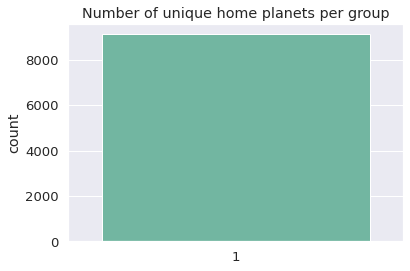

In [39]:
# Countplot of unique values
sns.countplot((GHP_gb>0).sum(axis=1))
plt.title('Number of unique home planets per group')

**Great!** This shows that everyone in the same group comes from the same home planet. So we can fill the missing HomePlanet values according to the group. (At least the ones where the group size is bigger than 1.)

In [40]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a group with known HomePlanet
GHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index

# Fill corresponding missing values
data.loc[GHP_index,'HomePlanet']=data.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 288
#HomePlanet missing values after: 157


We managed to fill 131 values with 100% confidence but we are not finished yet.

**HomePlanet and CabinDeck**

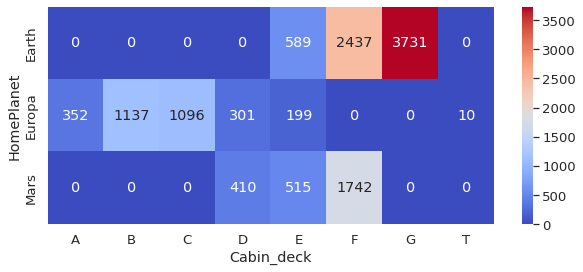

In [41]:
# Joint distribution of CabinDeck and HomePlanet
CDHP_gb=data.groupby(['Cabin_deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm')

*Notes:*
* Passengers on decks A, B, C or T came from Europa.
* Passengers on deck G came from Earth.
* Passengers on decks D, E or F came from multiple planets.

In [42]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Decks A, B, C or T came from Europa
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

# Deck G came from Earth
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='G'), 'HomePlanet']='Earth'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 157
#HomePlanet missing values after: 94


**HomePlanet and Surname**

Text(0.5, 1.0, 'Number of unique planets per surname')

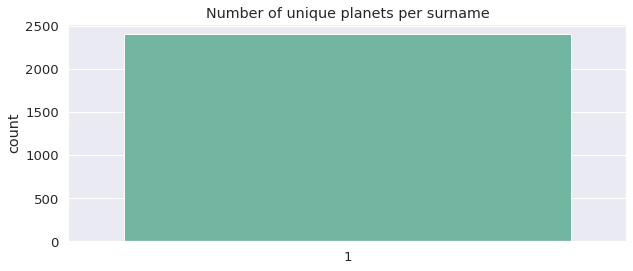

In [43]:
# Joint distribution of Surname and HomePlanet
SHP_gb=data.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Countplot of unique values
plt.figure(figsize=(10,4))
sns.countplot((SHP_gb>0).sum(axis=1))
plt.title('Number of unique planets per surname')

**Fantastic!** Everyone with the same surname comes from the same home planet.

In [44]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a family with known HomePlanet
SHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(SHP_gb.index)].index

# Fill corresponding missing values
data.loc[SHP_index,'HomePlanet']=data.iloc[SHP_index,:]['Surname'].map(lambda x: SHP_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 94
#HomePlanet missing values after: 10


In [45]:
# Only 10 HomePlanet missing values left - let's look at them
data[data['HomePlanet'].isna()][['PassengerId','HomePlanet','Destination']]

,PassengerId,HomePlanet,Destination
2274,2443_01,NaN,TRAPPIST-1e
2631,2817_01,NaN,TRAPPIST-1e
3091,3331_01,NaN,TRAPPIST-1e
4548,4840_01,NaN,TRAPPIST-1e
5762,6108_01,NaN,TRAPPIST-1e
8969,0616_01,NaN,TRAPPIST-1e
10583,4052_01,NaN,TRAPPIST-1e
11913,7065_01,NaN,TRAPPIST-1e
12551,8435_01,NaN,TRAPPIST-1e
12725,8775_01,NaN,TRAPPIST-1e


Everyone left is heading towards TRAPPIST-1e. So let's look at the joint distribution of HomePlanet and Destination.

**HomePlanet and Destination**

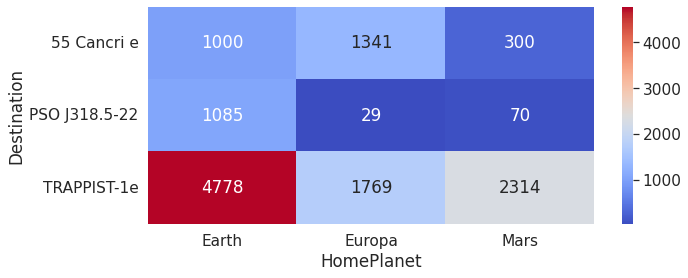

In [ ]:
# Joint distribution of HomePlanet and Destination
HPD_gb=data.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')

Most people heading towards TRAPPIST-1e came from Earth so it makes sense to guess they came from there. But remember from earlier, no one on deck D came from Earth so we need to filter these out.

In [46]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
data.loc[(data['HomePlanet'].isna()) & ~(data['Cabin_deck']=='D'), 'HomePlanet']='Earth'
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='D'), 'HomePlanet']='Mars'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 10
#HomePlanet missing values after: 0


**Awesome!** We're done with HomePlanet.

**Destination**

Since the majority (68%) of passengers are heading towards TRAPPIST-1e (see EDA section), we'll just impute this value (i.e. the mode). A better rule hasn't been found at this stage.

In [47]:
# Missing values before
D_bef=data['Destination'].isna().sum()

# Fill missing Destination values with mode
data.loc[(data['Destination'].isna()), 'Destination']='TRAPPIST-1e'

# Print number of missing values left
print('#Destination missing values before:',D_bef)
print('#Destination missing values after:',data['Destination'].isna().sum())

#Destination missing values before: 274
#Destination missing values after: 0


**Surname and group**


The reason we are filling missing surnames is because we will use surnames later to fill missing values of other features. It also means we can improve the accuracy of the family size feature.

Text(0.5, 1.0, 'Number of unique surnames by group')

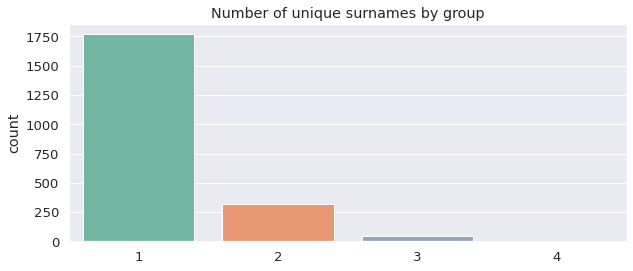

In [48]:
# Joint distribution of Group and Surname
GSN_gb=data[data['Group_size']>1].groupby(['Group','Surname'])['Surname'].size().unstack().fillna(0)

# Countplot of unique values
plt.figure(figsize=(10,4))
sns.countplot((GSN_gb>0).sum(axis=1))
plt.title('Number of unique surnames by group')

The majority (83%) of groups contain only 1 family. So let's fill missing surnames according to the majority surname in that group.

In [49]:
# Missing values before
SN_bef=data['Surname'].isna().sum()

# Passengers with missing Surname and in a group with known majority Surname
GSN_index=data[data['Surname'].isna()][(data[data['Surname'].isna()]['Group']).isin(GSN_gb.index)].index

# Fill corresponding missing values
data.loc[GSN_index,'Surname']=data.iloc[GSN_index,:]['Group'].map(lambda x: GSN_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Surname missing values before:',SN_bef)
print('#Surname missing values after:',data['Surname'].isna().sum())

#Surname missing values before: 294
#Surname missing values after: 155


That is the best we can do. We don't have to get rid of all of these missing values because we will end up dropping the surname feature anyway. However, we can update the family size feature.

In [50]:
# Replace NaN's with outliers (so we can use map)
data['Surname'].fillna('Unknown', inplace=True)

# Update family size feature
data['Family_size']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

# Put NaN's back in place of outliers
data.loc[data['Surname']=='Unknown','Surname']=np.nan

# Say unknown surname means no family
data.loc[data['Family_size']>100,'Family_size']=0

**CabinSide and Group**

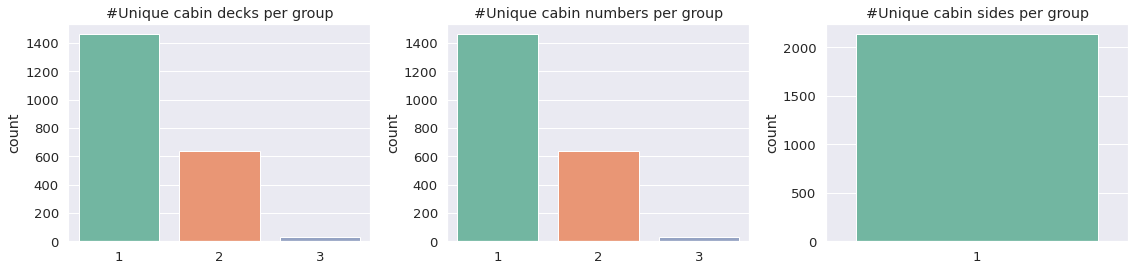

In [51]:
# Joint distribution of Group and Cabin features
GCD_gb=data[data['Group_size']>1].groupby(['Group','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
GCN_gb=data[data['Group_size']>1].groupby(['Group','Cabin_number'])['Cabin_number'].size().unstack().fillna(0)
GCS_gb=data[data['Group_size']>1].groupby(['Group','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

# Countplots
fig=plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.countplot((GCD_gb>0).sum(axis=1))
plt.title('#Unique cabin decks per group')

plt.subplot(1,3,2)
sns.countplot((GCN_gb>0).sum(axis=1))
plt.title('#Unique cabin numbers per group')

plt.subplot(1,3,3)
sns.countplot((GCS_gb>0).sum(axis=1))
plt.title('#Unique cabin sides per group')
fig.tight_layout()

**Another rule!** Everyone in the same group is also on the same cabin side. For cabin deck and cabin number there is also a fairly good (but not perfect) correlation with group.

In [52]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Passengers with missing Cabin side and in a group with known Cabin side
GCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Group']).isin(GCS_gb.index)].index

# Fill corresponding missing values
data.loc[GCS_index,'Cabin_side']=data.iloc[GCS_index,:]['Group'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 299
#Cabin_side missing values after: 162


**CabinSide and Surname**

Text(0.5, 1.0, 'Ratio of cabin side by surname')

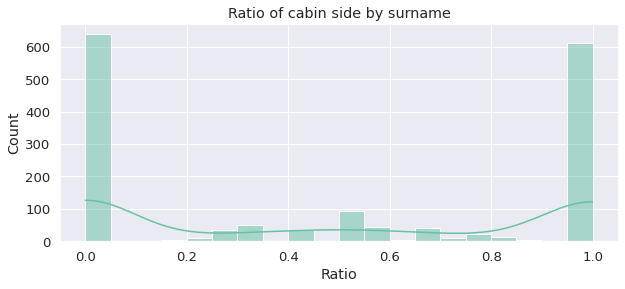

In [53]:
# Joint distribution of Surname and Cabin side
SCS_gb=data[data['Group_size']>1].groupby(['Surname','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

# Ratio of sides
SCS_gb['Ratio']=SCS_gb['P']/(SCS_gb['P']+SCS_gb['S'])

# Histogram of ratio
plt.figure(figsize=(10,4))
sns.histplot(SCS_gb['Ratio'], kde=True, binwidth=0.05)
plt.title('Ratio of cabin side by surname')

In [54]:
# Print proportion
print('Percentage of families all on the same cabin side:', 100*np.round((SCS_gb['Ratio'].isin([0,1])).sum()/len(SCS_gb),3),'%')

# Another view of the same information
SCS_gb.head()

Percentage of families all on the same cabin side: 76.7 %


Cabin_side,P,S,Ratio
Surname,,,
Acobson,0.00,3.00,0.00
Acobsond,3.00,0.00,1.00
Adavisons,6.00,0.00,1.00
Admingried,0.00,4.00,0.00
Aginge,3.00,0.00,1.00


This shows that families tend to be on the same cabin side (and 77% of families are entirely on the same side).

In [55]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Drop ratio column
SCS_gb.drop('Ratio', axis=1, inplace=True)

# Passengers with missing Cabin side and in a family with known Cabin side
SCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Surname']).isin(SCS_gb.index)].index

# Fill corresponding missing values
data.loc[SCS_index,'Cabin_side']=data.iloc[SCS_index,:]['Surname'].map(lambda x: SCS_gb.idxmax(axis=1)[x])

# Drop surname (we don't need it anymore)
data.drop('Surname', axis=1, inplace=True)

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 162
#Cabin_side missing values after: 66


The remaining missing values will be replaced with an outlier. This is because we really don't know which one of the two (balanced) sides we should assign.

In [56]:
# Value counts
data['Cabin_side'].value_counts()

S    6504
P    6400
Name: Cabin_side, dtype: int64

In [57]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Fill remaining missing values with outlier
data.loc[data['Cabin_side'].isna(),'Cabin_side']='Z'

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 66
#Cabin_side missing values after: 0


**CabinDeck and Group**

Remember (from above) that groups tend to be on the same cabin deck.

In [58]:
# Missing values before
CD_bef=data['Cabin_deck'].isna().sum()

# Passengers with missing Cabin deck and in a group with known majority Cabin deck
GCD_index=data[data['Cabin_deck'].isna()][(data[data['Cabin_deck'].isna()]['Group']).isin(GCD_gb.index)].index

# Fill corresponding missing values
data.loc[GCD_index,'Cabin_deck']=data.iloc[GCD_index,:]['Group'].map(lambda x: GCD_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Cabin_deck missing values before:',CD_bef)
print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 299
#Cabin_deck missing values after: 162


**CabinDeck and HomePlanet**

In [59]:
# Joint distribution
data.groupby(['HomePlanet','Destination','Solo','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)

Cabin_deck                         A      B      C      D      E       F  \
HomePlanet Destination   Solo                                              
Earth      55 Cancri e   0      0.00   0.00   0.00   0.00  20.00   90.00   
                         1      0.00   0.00   0.00   0.00  47.00  289.00   
           PSO J318.5-22 0      0.00   0.00   0.00   0.00  18.00   67.00   
                         1      0.00   0.00   0.00   0.00  25.00  262.00   
           TRAPPIST-1e   0      0.00   0.00   0.00   0.00 133.00  438.00   
                         1      0.00   0.00   0.00   0.00 358.00 1350.00   
Europa     55 Cancri e   0     96.00 377.00 313.00  59.00  35.00    0.00   
                         1     67.00 141.00 159.00  46.00  34.00    0.00   
           PSO J318.5-22 0      2.00   5.00  11.00   0.00   0.00    0.00   
                         1      0.00   0.00  10.00   0.00   0.00    0.00   
           TRAPPIST-1e   0    152.00 459.00 428.00 120.00  53.00    0.00   
                         1     44.00 179.00 201.00  84.00  82.00    0.00   
Mars       55 Cancri e   0      0.00   0.00   0.00  32.00  15.00  104.00   
                         1      0.00   0.00   0.00  40.00  16.00   92.00   
           PSO J318.5-22 0      0.00   0.00   0.00   8.00   9.00   14.00   
                         1      0.00   0.00   0.00   9.00   7.00   21.00   
           TRAPPIST-1e   0      0.00   0.00   0.00 168.00 219.00  798.00   
                         1      0.00   0.00   0.00 164.00 263.00  743.00   

Cabin_deck                          G    T  
HomePlanet Destination   Solo               
Earth      55 Cancri e   0     272.00 0.00  
                         1     269.00 0.00  
           PSO J318.5-22 0     230.00 0.00  
                         1     466.00 0.00  
           TRAPPIST-1e   0    1075.00 0.00  
                         1    1509.00 0.00  
Europa     55 Cancri e   0       0.00 2.00  
                         1       0.00 0.00  
           PSO J318.5-22 0       0.00 0.00  
                         1       0.00 0.00  
           TRAPPIST-1e   0       0.00 1.00  
                         1       0.00 8.00  
Mars       55 Cancri e   0       0.00 0.00  
                         1       0.00 0.00  
           PSO J318.5-22 0       0.00 0.00  
                         1       0.00 0.00  
           TRAPPIST-1e   0       0.00 0.00  
                         1       0.00 0.00

*Notes:*
* Passengers from Mars are most likely in deck F.
* Passengers from Europa are (more or less) most likely in deck C if travelling solo and deck B otherwise.
* Passengers from Earth are (more or less) most likely in deck G.

We will fill in missing values according to where the mode appears in these subgroups.

In [60]:
# Missing values before
CD_bef=data['Cabin_deck'].isna().sum()

# Fill missing values using the mode
na_rows_CD=data.loc[data['Cabin_deck'].isna(),'Cabin_deck'].index
data.loc[data['Cabin_deck'].isna(),'Cabin_deck']=data.groupby(['HomePlanet','Destination','Solo'])['Cabin_deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

# Print number of missing values left
print('#Cabin_deck missing values before:',CD_bef)
print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 162
#Cabin_deck missing values after: 0


**CabinNumber and CabinDeck**

Text(0.5, 1.0, 'Cabin_number vs group coloured by group')

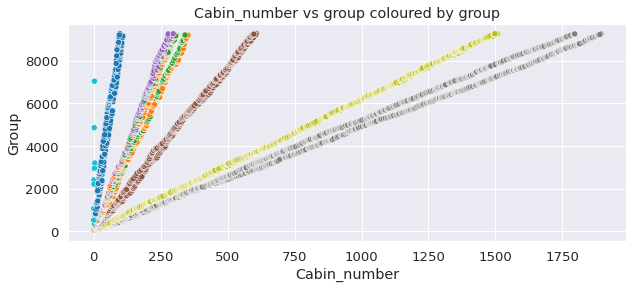

In [61]:
# Scatterplot
plt.figure(figsize=(10,4))
sns.scatterplot(x=data['Cabin_number'], y=data['Group'], c=LabelEncoder().fit_transform(data.loc[~data['Cabin_number'].isna(),'Cabin_deck']), cmap='tab10')
plt.title('Cabin_number vs group coloured by group')

There is an interesting pattern here. The cabin_number and group_number share a linear relationship on a deck by deck basis. We can therefore extrapolate the missing cabin numbers using linear regression on a deck by deck basis to get an approximate cabin number.

In [62]:
# Missing values before
CN_bef=data['Cabin_number'].isna().sum()

# Extrapolate linear relationship on a deck by deck basis
for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    # Features and labels
    X_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']
    y_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']
    X_test_CN=data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']

    # Linear regression
    model_CN=LinearRegression()
    model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
    preds_CN=model_CN.predict(X_test_CN.values.reshape(-1, 1))
    
    # Fill missing values with predictions
    data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']=preds_CN.astype(int)

# Print number of missing values left
print('#Cabin_number missing values before:',CN_bef)
print('#Cabin_number missing values after:',data['Cabin_number'].isna().sum())

#Cabin_number missing values before: 299
#Cabin_number missing values after: 0


Let's update the cabin regions with the new data.

In [63]:
# One-hot encode cabin regions
data['Cabin_region1']=(data['Cabin_number']<300).astype(int)
data['Cabin_region2']=((data['Cabin_number']>=300) & (data['Cabin_number']<600)).astype(int)
data['Cabin_region3']=((data['Cabin_number']>=600) & (data['Cabin_number']<900)).astype(int)
data['Cabin_region4']=((data['Cabin_number']>=900) & (data['Cabin_number']<1200)).astype(int)
data['Cabin_region5']=((data['Cabin_number']>=1200) & (data['Cabin_number']<1500)).astype(int)
data['Cabin_region6']=((data['Cabin_number']>=1500) & (data['Cabin_number']<1800)).astype(int)
data['Cabin_region7']=(data['Cabin_number']>=1800).astype(int)

**VIP**

VIP is a highly unbalanced binary feature so we will just impute the mode.

In [64]:
data['VIP'].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [65]:
# Missing values before
V_bef=data['VIP'].isna().sum()

# Fill missing values with mode
data.loc[data['VIP'].isna(),'VIP']=False

# Print number of missing values left
print('#VIP missing values before:',V_bef)
print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 296
#VIP missing values after: 0


**Age**

Age varies across many features like HomePlanet, group size, expenditure and cabin deck, so we will impute missing values according to the median of these subgroups.

In [66]:
# Joint distribution
data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].median().unstack().fillna(0)

Cabin_deck                      A     B     C     D     E     F     G     T
HomePlanet No_spending Solo                                                
Earth      0           0     0.00  0.00  0.00  0.00 24.00 25.00 28.00  0.00
                       1     0.00  0.00  0.00  0.00 25.00 24.00 26.00  0.00
           1           0     0.00  0.00  0.00  0.00  7.00 16.00  8.00  0.00
                       1     0.00  0.00  0.00  0.00 21.00 21.50 23.00  0.00
Europa     0           0    35.00 34.00 33.00 33.00 34.00  0.00  0.00 44.00
                       1    35.00 36.00 35.50 34.00 35.00  0.00  0.00 35.00
           1           0    30.00 27.00 28.50 27.00 28.00  0.00  0.00  0.00
                       1    37.50 34.00 35.00 31.00 33.00  0.00  0.00  0.00
Mars       0           0     0.00  0.00  0.00 30.00 29.00 29.00  0.00  0.00
                       1     0.00  0.00  0.00 31.00 28.50 30.00  0.00  0.00
           1           0     0.00  0.00  0.00 29.50 26.00 18.00  0.00  0.00
                       1     0.00  0.00  0.00 33.00 30.00 29.50  0.00  0.00

In [67]:
# Missing values before
A_bef=data[exp_feats].isna().sum().sum()

# Fill missing values using the median
na_rows_A=data.loc[data['Age'].isna(),'Age'].index
data.loc[data['Age'].isna(),'Age']=data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

# Print number of missing values left
print('#Age missing values before:',A_bef)
print('#Age missing values after:',data['Age'].isna().sum())

#Age missing values before: 1410
#Age missing values after: 0


Let's update the age_group feature using the new data.

In [68]:
# Update age group feature
data.loc[data['Age']<=12,'Age_group']='Age_0-12'
data.loc[(data['Age']>12) & (data['Age']<18),'Age_group']='Age_13-17'
data.loc[(data['Age']>=18) & (data['Age']<=25),'Age_group']='Age_18-25'
data.loc[(data['Age']>25) & (data['Age']<=30),'Age_group']='Age_26-30'
data.loc[(data['Age']>30) & (data['Age']<=50),'Age_group']='Age_31-50'
data.loc[data['Age']>50,'Age_group']='Age_51+'

**CryoSleep**

The best way to predict if a passenger is in CryoSleep or not is to see if they spent anything.

In [69]:
# Joint distribution
data.groupby(['No_spending','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)

CryoSleep,False,True
No_spending,,
0,7339.00,0.00
1,740.00,4581.00


In [70]:
# Missing values before
CSL_bef=data['CryoSleep'].isna().sum()

# Fill missing values using the mode
na_rows_CSL=data.loc[data['CryoSleep'].isna(),'CryoSleep'].index
data.loc[data['CryoSleep'].isna(),'CryoSleep']=data.groupby(['No_spending'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

# Print number of missing values left
print('#CryoSleep missing values before:',CSL_bef)
print('#CryoSleep missing values after:',data['CryoSleep'].isna().sum())

#CryoSleep missing values before: 310
#CryoSleep missing values after: 0


**Expenditure and CryoSleep**

This one makes a lot of sense. We don't expect people in CryoSleep to be able to spend anything.

In [71]:
print('Maximum expenditure of passengers in CryoSleep:',data.loc[data['CryoSleep']==True,exp_feats].sum(axis=1).max())

Maximum expenditure of passengers in CryoSleep: 0.0


In [72]:
# Missing values before
E_bef=data[exp_feats].isna().sum().sum()

# CryoSleep has no expenditure
for col in exp_feats:
    data.loc[(data[col].isna()) & (data['CryoSleep']==True), col]=0

# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 1410
#Expenditure missing values after: 866


**Expenditure and others**

Expenditure varies across many features but we will only impute missing values using HomePlanet, Solo and Age group to prevent overfitting. We will also use the mean instead of the median because a large proportion of passengers don't spend anything and median usually comes out as 0. Note how under 12's don't spend anything.

In [73]:
# Joint distribution
data.groupby(['HomePlanet','Solo','Age_group'])['Expenditure'].mean().unstack().fillna(0)

Age_group        Age_0-12  Age_13-17  Age_18-25  Age_26-30  Age_31-50  Age_51+
HomePlanet Solo                                                               
Earth      0         0.00     724.90     789.70     841.09     736.66   733.65
           1         0.00     693.01     779.40     795.42     794.82   826.37
Europa     0         0.00    1153.16    2652.01    3534.67    3975.77  3483.64
           1         0.00       0.00    2489.89    3806.00    3949.94  3952.09
Mars       0         0.00    1176.84    1161.81    1247.10    1143.67  1345.42
           1         0.00    1687.26    1075.34    1107.12    1110.39  1100.30

In [74]:
# Missing values before
E_bef=data[exp_feats].isna().sum().sum()

# Fill remaining missing values using the median
for col in exp_feats:
    na_rows=data.loc[data[col].isna(),col].index
    data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Solo','Age_group'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]
    
# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 866
#Expenditure missing values after: 0


Finally, we can update the expenditure and no_spending features with these new data points.

In [75]:
# Update expenditure and no_spending
data['Expenditure']=data[exp_feats].sum(axis=1)
data['No_spending']=(data['Expenditure']==0).astype(int)

In [76]:
data.isna().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Age_group        0
Expenditure      0
No_spending      0
Group            0
Group_size       0
Solo             0
Cabin_deck       0
Cabin_number     0
Cabin_side       0
Cabin_region1    0
Cabin_region2    0
Cabin_region3    0
Cabin_region4    0
Cabin_region5    0
Cabin_region6    0
Cabin_region7    0
Family_size      0
dtype: int64

**No missing values left!** It was a lot of effort but it should improve the accuracy of our models.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="7"></a>
# 7. Preprocessing

**Split data back into train and test sets**

In [91]:
# Train and test
X=data[data['PassengerId'].isin(train['PassengerId'].values)].copy()
X_test=data[data['PassengerId'].isin(test['PassengerId'].values)].copy()

**Drop unwanted features**

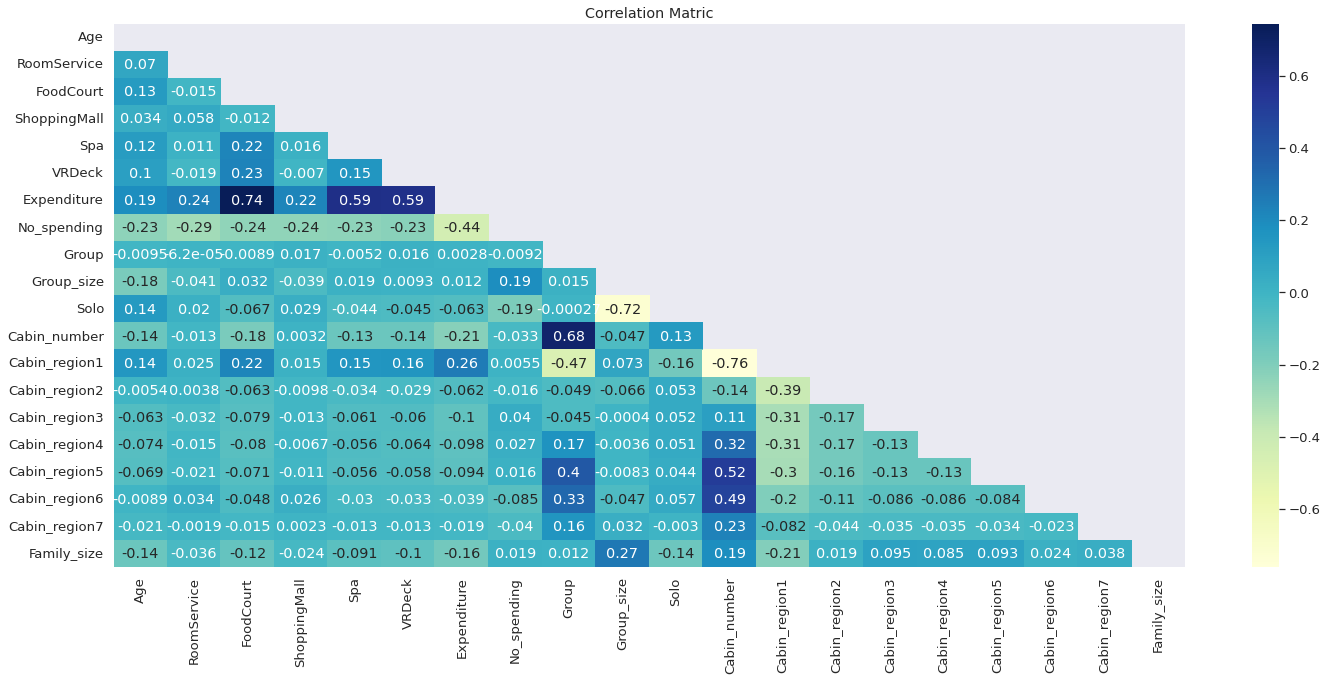

In [92]:
plt.figure(figsize = (24,10))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.title("Correlation Matric")
plt.show()

In [84]:
# Drop qualitative/redundant/collinear/high cardinality features
X.drop(['PassengerId', 'Group', 'Group_size', 'Age_group', 'Cabin_number'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Group', 'Group_size', 'Age_group', 'Cabin_number'], axis=1, inplace=True)

**Log transform**

The logarithm transform is used to decrease skew in distributions, especially with large outliers. It can make it easier for algorithms to 'learn' the correct relationships. We will apply it to the expenditure features as these are heavily skewed by outliers.

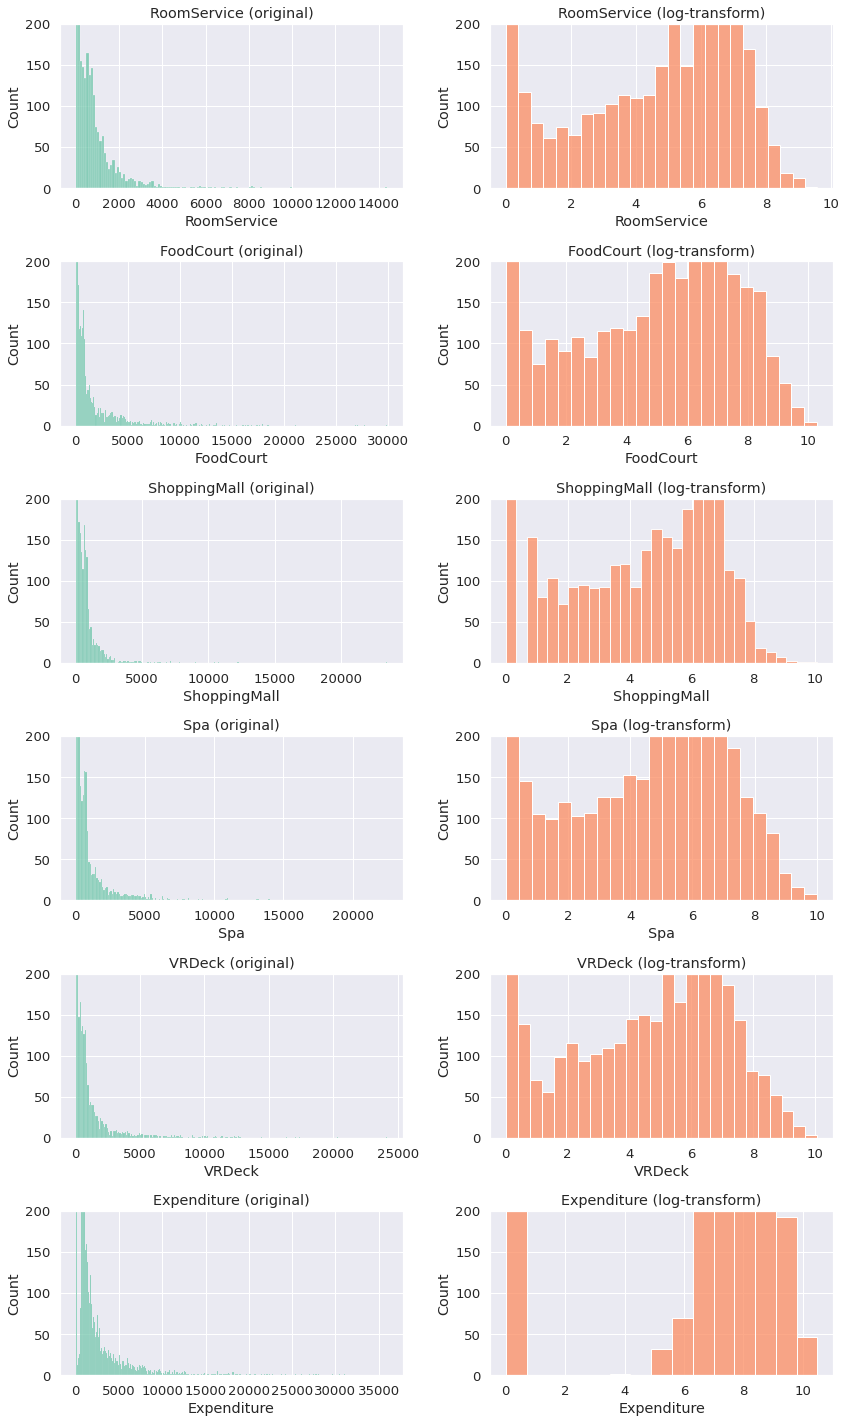

In [85]:
# Plot log transform results
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(X[col], binwidth=100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+X[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

In [86]:
# Apply log transform
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']:
    X[col]=np.log(1+X[col])
    X_test[col]=np.log(1+X_test[col])

**Encoding and scaling**

We will use column transformers to be more professional. It's also good practice.

In [87]:
# Indentify numerical and categorical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Scale numerical data to have mean=0 and variance=1
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode categorical data
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='error',sparse=False))])

# Combine preprocessing
ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
        remainder='passthrough')

# Apply preprocessing
X = ct.fit_transform(X)
X_test = ct.transform(X_test)

# Print new shape
print('Training set shape:', X.shape)

Training set shape: (8693, 36)


**PCA**

Just for fun, let's look at the transformed data in PCA space. This gives a low dimensional representation of the data, which preserves local and global structure.

In [88]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y, size=0.1*np.ones(len(X)), opacity = 1,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=500
)
fig.show()

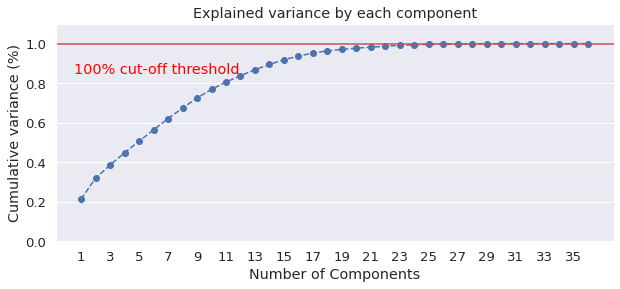

In [89]:
# Explained variance (how important each additional principal component is)
pca = PCA().fit(X)
fig, ax = plt.subplots(figsize=(10,4))
xi = np.arange(1, 1+X.shape[1], step=1)
yi = np.cumsum(pca.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+X.shape[1], step=2))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold', color = 'red')
ax.grid(axis='x')

**Create a validation set**

We will use this to choose which model(s) to use.

In [90]:
# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="8"></a>
# 8. Model selection

To briefly mention the algorithms we will use,

**Logistic Regression:** Unlike linear regression which uses Least Squares, this model uses Maximum Likelihood Estimation to fit a sigmoid-curve on the target variable distribution. The sigmoid/logistic curve is commonly used when the data is questions had binary output.

**K-Nearest Neighbors (KNN):** KNN works by selecting the majority class of the k-nearest neighbours, where the metric used is usually Euclidean distance. It is a simple and effective algorithm but can be sensitive by many factors, e.g. the value of k, the preprocessing done to the data and the metric used.

**Support Vector Machine (SVM):** SVM finds the optimal hyperplane that seperates the data in the feature space. Predictions are made by looking at which side of the hyperplane the test point lies on. Ordinary SVM assumes the data is linearly separable, which is not always the case. A kernel trick can be used when this assumption fails to transform the data into a higher dimensional space where it is linearly seperable. SVM is a popular algorithm because it is computationally effecient and produces very good results.

**Random Forest (RF):** RF is a reliable ensemble of decision trees, which can be used for regression or classification problems. Here, the individual trees are built via bagging (i.e. aggregation of bootstraps which are nothing but multiple train datasets created via sampling with replacement) and split using fewer features. The resulting diverse forest of uncorrelated trees exhibits reduced variance; therefore, is more robust towards change in data and carries its prediction accuracy to new data. It works well with both continuous & categorical data.

**Extreme Gradient Boosting (XGBoost):** XGBoost is similar to RF in that it is made up of an ensemble of decision-trees. The difference arises in how those trees as derived; XGboost uses extreme gradient boosting when optimising its objective function. It often produces the best results but is relatively slow compared to other gradient boosting algorithms.

**Light Gradient Boosting Machine (LGBM):** LGBM works essentially the same as XGBoost but with a lighter boosting technique. It usually produces similar results to XGBoost but is significantly faster.

**Categorical Boosting (CatBoost):** CatBoost is an open source algorithm based on gradient boosted decision trees. It supports numerical, categorical and text features. It works well with heterogeneous data and even relatively small data. Informally, it tries to take the best of both worlds from XGBoost and LGBM.

**Naive Bayes (NB):** Naive Bayes learns how to classify samples by using Bayes' Theorem. It uses prior information to 'update' the probability of an event by incoorporateing this information according to Bayes' law. The algorithm is quite fast but a downside is that it assumes the input features are independent, which is not always the case.

We will train these models and evaluate them on the validation set to then choose which ones to carry through to the next stage (cross validation).

**Define classifiers**

In [ ]:
# Classifiers
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=0, probability=True),
    "RandomForest" : RandomForestClassifier(random_state=0),
    "XGBoost" : XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss'), # XGBoost takes too long
    "LGBM" : LGBMClassifier(random_state=0),
    "CatBoost" : CatBoostClassifier(random_state=0, verbose=False),
    "NaiveBayes": GaussianNB()
}

# Grids for grid search
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

xgbc_grid = {
        "gamma": [0.5, 1, 1.5],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0],
        "max_depth": [3, 4, 5],
        "n_estimators": [50, 100, 150, 200, 250, 300],
        'learning_rate': [0.05, 0.1, 0.15]
}

NB_grid={'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}

# Dictionary of all grids
grid = {
    "LogisticRegression" : LR_grid,
    "KNN" : KNN_grid,
    "SVC" : SVC_grid,
    "RandomForest" : RF_grid,
    "XGBoost" : xgbc_grid,
    "LGBM" : boosted_grid,
    "CatBoost" : boosted_grid,
    "NaiveBayes": NB_grid
}

**Train and evaluate models**

Train models with grid search (but no cross validation so it doesn't take too long) to get a rough idea of which are the best models for this dataset.

In [ ]:
xgbc = XGBClassifier()

xgbc_cv_model = GridSearchCV(xgbc, xgbc_grid, cv = 10, n_jobs = -1)
xgbc_cv_model.fit(X_train, y_train)

print("Best hyperparametres of the model: \n", xgbc_cv_model.best_params_)

KeyboardInterrupt: ignored

In [ ]:
#we get these hyperparameters with GridSearchCV method above

xgbc_tuned = XGBClassifier(gamma = 1.5,
                           subsample = 1.0,
                           max_depth = 5,
                           colsample_bytree = 1.0,
                           n_estimators = 100)
xgbc_tuned = xgbc_tuned.fit(X_train, y_train)

In [ ]:
y_pred = xgbc_tuned.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.7941345600920069

In [ ]:
print(classification_report(y_valid, y_pred))

In [ ]:
i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_valid, y_valid)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

Model: LogisticRegression
Training time (mins): 0.05

Model: KNN
Training time (mins): 0.04

Model: SVC
Training time (mins): 1.18

Model: RandomForest
Training time (mins): 0.14

[01:31:34] WARNING: /workspace/src/learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Model: XGBoost
Training time (mins): 6.28

Model: LGBM
Training time (mins): 0.05

Model: CatBoost
Training time (mins): 2.86

Model: NaiveBayes
Training time (mins): 0.01



In [ ]:
# Show results
valid_scores

,Classifer,Validation accuracy,Training time
0,LogisticRegression,0.77,0.05
1,KNN,0.75,0.04
2,SVC,0.79,1.18
3,RandomForest,0.79,0.14
4,XGBoost,0.80,6.28
5,LGBM,0.80,0.05
6,CatBoost,0.81,2.86
7,NaiveBayes,0.72,0.01


Motivated by this, we will take LGBM and CatBoost to the final stage of modelling.

In [ ]:
# Show best parameters from grid search
clf_best_params

{'LogisticRegression': {'C': 0.5, 'max_iter': 100, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 9, 'p': 2},
 'SVC': {'C': 1.25, 'gamma': 'scale', 'kernel': 'rbf'},
 'RandomForest': {'max_depth': 10, 'n_estimators': 250},
 'XGBoost': {'colsample_bytree': 0.8,
  'gamma': 1.5,
  'learning_rate': 0.05,
  'max_depth': 5,
  'n_estimators': 150,
  'subsample': 0.8},
 'LGBM': {'learning_rate': 0.05, 'max_depth': 12, 'n_estimators': 100},
 'CatBoost': {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 100},
 'NaiveBayes': {'var_smoothing': 1e-07}}

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="9"></a>
# 9. Modelling

We can finally train our best model on the whole training set using cross validation and ensembling predictions together to produce the most confident predictions.

**Define best models**

In [ ]:
# Classifiers
best_classifiers = {
    "LGBM" : LGBMClassifier(**clf_best_params["LGBM"], random_state=0),
    "XGBoost" : XGBClassifier(**clf_best_params["XGBoost"],random_state=0, use_label_encoder=False, eval_metric='logloss'),
    "CatBoost" : CatBoostClassifier(**clf_best_params["CatBoost"], verbose=False, random_state=0),
}

**Cross validation and ensembling predictions**

Predictions are ensembled together using soft voting. This averages the predicted probabilies to produce the most confident predictions.

In [ ]:
# Number of folds in cross validation
FOLDS=10

preds=np.zeros(len(X_test))
for key, classifier in best_classifiers.items():
    start = time.time()
    
    # 10-fold cross validation
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0)
    
    score=0
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        # Get training and validation sets
        X_train, X_valid = X[train_idx], X[val_idx]
        y_train, y_valid = y[train_idx], y[val_idx]

        # Train model
        clf = classifier
        clf.fit(X_train, y_train)

        # Make predictions and measure accuracy
        preds += clf.predict_proba(X_test)[:,1]
        score += clf.score(X_valid, y_valid)

    # Average accuracy    
    score=score/FOLDS
    
    # Stop timer
    stop = time.time()

    # Print accuracy and time
    print('Model:', key)
    print('Average validation accuracy:', np.round(100*score,2))
    print('Training time (mins):', np.round((stop - start)/60,2))
    print('')
    
# Ensemble predictions
preds=preds/(FOLDS*len(best_classifiers))

Model: LGBM
Average validation accuracy: 81.15
Training time (mins): 0.09



<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="10"></a>
# 10. Submission

Let's look at the distribution of the predicted probabilities.

Text(0.5, 0, 'Probability')

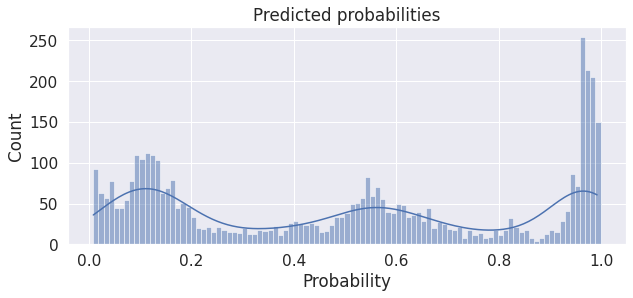

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(preds, binwidth=0.01, kde=True)
plt.title('Predicted probabilities')
plt.xlabel('Probability')

It is interesting to see that the models are either very confident or very unconfident but not much in between.

**Post processing**

Finally, we need to convert each predicted probability into one of the two classes (transported or not). The simplest way is to round each probability to the nearest integer (0 for False or 1 for True). However, assuming the train and test sets have similar distributions, we can tune the classification threshold to obtain a similar proportion of transported/not transported in our predictions as in the train set. Remember that the proportion of transported passengers in the train set was 50.4%.

In [ ]:
# Proportion (in test set) we get from rounding
print(np.round(100*np.round(preds).sum()/len(preds),2))

52.82


Our models seem to (potentially) overestimate the number of transported passengers in the test set. Let's try to bring that proportion down a bit. 

Optimal threshold: 0.51


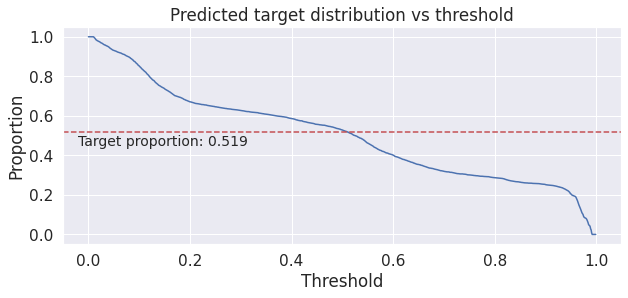

In [ ]:
# Proportion of predicted positive (transported) classes
def preds_prop(preds_arr, thresh):
    pred_classes=(preds_arr>=thresh).astype(int)
    return pred_classes.sum()/len(pred_classes)

# Plot proportions across a range of thresholds
def plot_preds_prop(preds_arr):
    # Array of thresholds
    T_array=np.arange(0,1,0.001)
    
    # Calculate proportions
    prop=np.zeros(len(T_array))
    for i, T in enumerate(T_array):
        prop[i]=preds_prop(preds_arr, T)
        
    # Plot proportions
    plt.figure(figsize=(10,4))
    plt.plot(T_array, prop)
    target_prop=0.519         # Experiment with this value
    plt.axhline(y=target_prop, color='r', linestyle='--')
    plt.text(-0.02,0.45,f'Target proportion: {target_prop}', fontsize=14)
    plt.title('Predicted target distribution vs threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Proportion')
    
    # Find optimal threshold (the one that leads to the proportion being closest to target_prop)
    T_opt=T_array[np.abs(prop-target_prop).argmin()]
    print('Optimal threshold:', T_opt)
    return T_opt
    
T_opt=plot_preds_prop(preds)

In [ ]:
# Classify test set using optimal threshold
preds_tuned=(preds>=T_opt).astype(int)

**Submit predictions**

Text(0.5, 1.0, 'Prediction distribution')

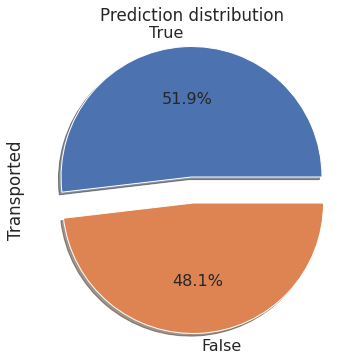

In [ ]:
# Sample submission (to get right format)
sub=pd.read_csv('data/sample_submission.csv')

# Add predictions
sub['Transported']=preds_tuned

# Replace 0 to False and 1 to True
sub=sub.replace({0:False, 1:True})

# Prediction distribution
plt.figure(figsize=(6,6))
sub['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Prediction distribution")

In [ ]:
# Output to csv
sub.to_csv('submissions/submission_04.csv', index=False)

# Wrangling with XGboost Hyperparameters

In [ ]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json
from sklearn import manifold

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder

import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from xgboost import plot_tree

warnings.filterwarnings('ignore')

In [ ]:
# DMatrix is an internal data structure that is used by XGBoost, which is optimized for both memory efficiency and training speed.

In [ ]:
def xgb_helper(PARAMETERS,V_PARAM_NAME=False,V_PARAM_VALUES=False,BR=10):
    
    temp_dmatrix =xgb.DMatrix(data=X_train, label=y_train)
    
    if V_PARAM_VALUES==False:
        cv_results = xgb.cv(dtrain=temp_dmatrix, nfold=5,num_boost_round=BR,params=PARAMETERS, as_pandas=True, seed=123 )
        return cv_results
    
    else:
        results=[]
        
        for v_param_value in V_PARAM_VALUES:
            PARAMETERS[V_PARAM_NAME]=v_param_value
            cv_results = xgb.cv(dtrain=temp_dmatrix, nfold=5,num_boost_round=BR,params=PARAMETERS, as_pandas=True, seed=123)
            results.append((cv_results["train-auc-mean"].tail().values[-1],cv_results["test-auc-mean"].tail().values[-1]))
            
        data = list(zip(V_PARAM_VALUES, results))
        print(pd.DataFrame(data,columns=[V_PARAM_NAME,"auc"]))
        
        return cv_results

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc"}
xgb_helper(PARAMETERS)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.90,0.00,0.87,0.01
1,0.90,0.00,0.88,0.01
2,0.91,0.00,0.88,0.01
3,0.91,0.00,0.89,0.01
4,0.92,0.00,0.89,0.01
5,0.92,0.00,0.89,0.01
6,0.92,0.00,0.89,0.01
7,0.93,0.00,0.89,0.01
8,0.93,0.00,0.89,0.01
9,0.93,0.00,0.90,0.01


In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix =xgb.DMatrix(data=X_train, label=y_train)

# Create the parameter dictionary for each tree: params 
params = {"objective":"binary:logistic", "max_depth":5}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15, 20, 25]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=5, num_boost_round=curr_num_rounds, metrics="auc", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-auc-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","auc"]))

   num_boosting_rounds  auc
0                    5 0.89
1                   10 0.89
2                   15 0.90
3                   20 0.90
4                   25 0.90


In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5}
xgb_helper(PARAMETERS)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.90,0.00,0.87,0.01
1,0.91,0.00,0.88,0.01
2,0.92,0.00,0.89,0.01
3,0.92,0.00,0.89,0.01
4,0.93,0.00,0.89,0.01
5,0.93,0.00,0.89,0.01
6,0.93,0.00,0.89,0.01
7,0.94,0.00,0.89,0.01
8,0.94,0.00,0.89,0.01
9,0.94,0.00,0.89,0.01


In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5}
V_PARAM_NAME="max_depth"
V_PARAM_VALUES=range(3,10,1)

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

   max_depth                              auc
0          3           (0.9014822, 0.8877458)
1          4  (0.9143072, 0.8951893999999999)
2          5            (0.9273562, 0.894834)
3          6   (0.9411926000000002, 0.894495)
4          7             (0.954974, 0.893984)
5          8           (0.9669416, 0.8916556)
6          9             (0.9759316, 0.88942)


In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5}
V_PARAM_NAME="min_child_weight"
V_PARAM_VALUES=range(0,5,1)

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

   min_child_weight                             auc
0                 0  (0.9293773999999999, 0.897973)
1                 1           (0.9273562, 0.894834)
2                 2          (0.9259304, 0.8964784)
3                 3  (0.9248084000000001, 0.896687)
4                 4          (0.9236124, 0.8972258)


In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5,"min_child_weight":1}
V_PARAM_NAME = "gamma"
V_PARAM_VALUES = [0.1,0.2,0.5,1,1.5,2]

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

   gamma                                       auc
0   0.10           (0.9271790000000001, 0.8955938)
1   0.20  (0.9272577999999999, 0.8958434000000001)
2   0.50                    (0.9269916, 0.8970228)
3   1.00           (0.9272174, 0.8969769999999999)
4   1.50            (0.927399, 0.8984989999999999)
5   2.00                    (0.9263928, 0.8973298)


In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5,"min_child_weight":1,"gamma":1}
V_PARAM_NAME = "subsample"
V_PARAM_VALUES = [.4,.5,.6,.7,.8,.9]

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

   subsample                                       auc
0       0.40                     (0.9168186, 0.887889)
1       0.50           (0.9197606, 0.8910463999999999)
2       0.60           (0.9218189999999999, 0.8931592)
3       0.70  (0.9241202000000002, 0.8941116000000001)
4       0.80                    (0.9258362, 0.8945252)
5       0.90  (0.9263486000000001, 0.8959209999999999)


In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5,"min_child_weight":1,"gamma":1,"subsample":0.7}
V_PARAM_NAME = "colsample_bytree"
V_PARAM_VALUES = [.4,.5,.6,.7,.8,.9]

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

   colsample_bytree                                       auc
0              0.40                     (0.9141154, 0.887673)
1              0.50  (0.9168799999999999, 0.8902431999999999)
2              0.60           (0.9199695999999999, 0.8909264)
3              0.70                    (0.9217216, 0.8924044)
4              0.80                    (0.9224224, 0.8932358)
5              0.90           (0.9243174, 0.8941994000000001)


In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5,"min_child_weight":1,
            "gamma":1,"subsample":0.7,"colsample_bytree":.8}

V_PARAM_NAME = "scale_pos_weight"
V_PARAM_VALUES = [.5,1,2]

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

   scale_pos_weight                              auc
0              0.50            (0.9205866, 0.892667)
1              1.00           (0.9224224, 0.8932358)
2              2.00  (0.9235078000000001, 0.8918336)


In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5,"min_child_weight":1,
            "gamma":1,"subsample":0.7,"colsample_bytree":.8, "scale_pos_weight":1}

V_PARAM_NAME = "reg_alpha"
V_PARAM_VALUES = np.linspace(start=0.001, stop=1, num=20).tolist()

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

    reg_alpha                                       auc
0        0.00                    (0.9224228, 0.8930712)
1        0.05            (0.922565, 0.8933095999999999)
2        0.11           (0.9226324, 0.8931150000000001)
3        0.16           (0.9230122000000002, 0.8927764)
4        0.21            (0.923011, 0.8934997999999998)
5        0.26            (0.9223085999999998, 0.892864)
6        0.32           (0.9223958, 0.8927111999999999)
7        0.37           (0.9222306, 0.8923348000000001)
8        0.42  (0.9222670000000001, 0.8923791999999999)
9        0.47           (0.9216444000000001, 0.8926638)
10       0.53            (0.9215679999999999, 0.892747)
11       0.58  (0.9216944000000001, 0.8928100000000001)
12       0.63           (0.9211356, 0.8936854000000001)
13       0.68  (0.9208554000000001, 0.8933367999999999)
14       0.74  (0.9214134000000002, 0.8929769999999999)
15       0.79                    (0.9214276, 0.8933816)
16       0.84  (0.9214179999999998, 0.8933389999

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5,"min_child_weight":1,
            "gamma":1,"subsample":0.7,"colsample_bytree":.8, "scale_pos_weight":1,"reg_alpha":0.15}

V_PARAM_NAME = "reg_lambda"
V_PARAM_VALUES = np.linspace(start=0.001, stop=1, num=20).tolist()

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

    reg_lambda                                       auc
0         0.00             (0.9251775999999999, 0.89336)
1         0.05                    (0.9248834, 0.8928948)
2         0.11                    (0.9247428, 0.8928092)
3         0.16            (0.924718, 0.8925753999999999)
4         0.21           (0.9244729999999999, 0.8935212)
5         0.26                     (0.925162, 0.8929558)
6         0.32  (0.9243891999999999, 0.8925036000000001)
7         0.37                    (0.9239198, 0.8930974)
8         0.42                    (0.9244226, 0.8930952)
9         0.47            (0.9238783999999999, 0.893033)
10        0.53            (0.9227339999999999, 0.893364)
11        0.58           (0.9228949999999999, 0.8932852)
12        0.63                    (0.9226568, 0.8934706)
13        0.68  (0.9231962000000001, 0.8926892000000001)
14        0.74           (0.9227614, 0.8925658000000001)
15        0.79  (0.9233175999999998, 0.8920411999999999)
16        0.84  (0.922385199999

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","max_depth":5,"min_child_weight":1,
            "gamma":1,"subsample":0.7,"colsample_bytree":.8, "scale_pos_weight":1,"reg_alpha":0.15,
           "reg_lambda":1}

V_PARAM_NAME = "learning_rate"
V_PARAM_VALUES = np.linspace(start=0.01, stop=0.3, num=10).tolist()

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

   learning_rate                                       auc
0           0.01           (0.8955216, 0.8804711999999999)
1           0.04  (0.8983024000000001, 0.8822509999999999)
2           0.07  (0.9009433999999998, 0.8836358000000001)
3           0.11                    (0.9039996, 0.8864312)
4           0.14           (0.9062188000000001, 0.8885612)
5           0.17  (0.9084361999999999, 0.8894667999999999)
6           0.20            (0.910633, 0.8902452000000001)
7           0.24                    (0.9131186, 0.8920574)
8           0.27                    (0.9148738, 0.8927956)
9           0.30  (0.9169432000000001, 0.8911922000000001)


In [ ]:
y_train

0       0
1       1
2       0
3       0
5       1
       ..
8687    1
8688    0
8689    0
8691    0
8692    1
Name: Transported, Length: 7824, dtype: int64

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","max_depth":5,"min_child_weight":1,
            "gamma":1,"subsample":0.7,"colsample_bytree":.8, "scale_pos_weight":1,"reg_alpha":0.15,
           "reg_lambda":1,"learning_rate": 0.3}

clf = xgb.XGBClassifier( tree_method="gpu_hist",objective="binary:logistic",eval_metric="auc",max_depth=5,min_child_weight=1,
            gamma=1,subsample=0.7,colsample_bytree=.8, scale_pos_weight=1,reg_alpha=0.15,
           reg_lambda=1,learning_rate= 0.3,n_estimators=800)



In [ ]:
clf.fit(X_train,y_train)

clf.save_model("models/categorical-model.json")

XGBoostError: ignored

In [ ]:
pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=["0","1"]))

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred)

In [ ]:
# Get a graph
graph = xgb.to_graphviz(clf, num_trees=1)
# Or get a matplotlib axis
ax = xgb.plot_tree(clf, num_trees=1)
# Get feature importances
plt.show()

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc"}
xgb_helper(PARAMETERS)

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc", "max_depth":2 , "min_child_weight":3, "gamma":2}
xgb_helper(PARAMETERS)

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc", "subsample":0.3,"colsample_bytree":0.3,"eta":.05}
xgb_helper(PARAMETERS,25) #increasing num bossting round to 15

In [ ]:
# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)

In [ ]:
test.iloc[:,1:]

In [ ]:
%%time

#dictionary for collecting results
results_dict = {}

#obtaining default parameters by calling .fit() to XGBoost model instance
xgbc0 = xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
xgbc0.fit(X_train , y_train)

#extracting default parameters from benchmark model
default_params = {}
gparams = xgbc0.get_params()

#default parameters have to be wrapped in lists - even single values - so GridSearchCV can take them as inputs
for key in gparams.keys():
    gp = gparams[key]
    default_params[key] = [gp]

#benchmark model. Grid search is not performed, since only single values are provided as parameter grid.
#However, cross-validation is still executed
clf0 = GridSearchCV(estimator=xgbc0, scoring='accuracy', param_grid=default_params, return_train_score=True, verbose=1, cv=3)
clf0.fit(X_train, y_train.values.ravel())

#results dataframe
df = pd.DataFrame(clf0.cv_results_)

#predictions - inputs to confusion matrix
train_predictions = clf0.predict(X_train)
test_predictions = clf0.predict(X_valid)
unseen_predictions = clf0.predict(test.iloc[:,1:])

#confusion matrices
cfm_train = confusion_matrix(y_train, train_predictions)
cfm_test = confusion_matrix(y_valid, test_predictions)
#cfm_unseen = confusion_matrix(df_test.iloc[:,:1], unseen_predictions)

#accuracy scores
accs_train = accuracy_score(y_train, train_predictions)
accs_test = accuracy_score(y_valid, test_predictions)
#accs_unseen = accuracy_score(df_test.iloc[:,:1], unseen_predictions)

#F1 scores for each train/test label
f1s_train_p1 = f1_score(y_train, train_predictions, pos_label=1)
f1s_train_p0 = f1_score(y_train, train_predictions, pos_label=0)
f1s_test_p1 = f1_score(y_valid, test_predictions, pos_label=1)
f1s_test_p0 = f1_score(y_valid, test_predictions, pos_label=0)
#f1s_unseen_p1 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=1)
#f1s_unseen_p0 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=0)

#Area Under the Receiver Operating Characteristic Curve
test_ras = roc_auc_score(y_valid, clf0.predict_proba(X_valid)[:,1])
#unseen_ras = roc_auc_score(df_test.iloc[:,:1], clf0.predict_proba(df_test.iloc[:,1:])[:,1])

#best parameters
bp = clf0.best_params_

#storing computed values in results dictionary
results_dict['xgbc0'] = {'iterable_parameter': np.nan,
                         'classifier': deepcopy(clf0),
                         'cv_results': df.copy(),
                         'cfm_train': cfm_train,
                         'cfm_test': cfm_test,
                         #'cfm_unseen': cfm_unseen,
                         'train_accuracy': accs_train,
                         'test_accuracy': accs_test,
                         #'unseen_accuracy': accs_unseen,
                         'train F1-score label 1': f1s_train_p1,
                         'train F1-score label 0': f1s_train_p0,
                         'test F1-score label 1': f1s_test_p1,
                         'test F1-score label 0': f1s_test_p0,
                         #'unseen F1-score label 1': f1s_unseen_p1,
                         #'unseen F1-score label 0': f1s_unseen_p0,
                         'test roc auc score': test_ras,
                         #'unseen roc auc score': unseen_ras,
                         'best_params': bp}

# Exploratory Data Analysis II

<a id="4.1"></a>
## <span style="color:#e76f51;"> Overview of Data </span>

In [ ]:
train.drop(["PassengerId"] , axis = 1 , inplace = True)
test.drop(["PassengerId"] , axis = 1 , inplace = True)
TARGET = 'Transported'
FEATURES = [col for col in train.columns if col != TARGET]
RANDOM_STATE = 12 

In [ ]:
train.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

<a id="4.7"></a>
## <span style="color:#e76f51;"> Null Value Distribution  </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Null Value Distribution :</u></b><br>
 
* <i> The maximum of missing value in an row is <b><u>3</u></b> and the lowest is <b><u>no missing value</u></b></i><br>
* <i> Interestingly, the missing value distribution (row basis) is quite the same between <b><u>train</u></b> and <b><u>test</u></b> dataset. </i><br>
* <i> There are around <b><u>76%</u></b> of the observations (row basis) that has no missing values.  </i><br>
* <i> Rest <b><u>24%</u></b> of the observations (row basis) that have <b><u>1 to 3</u></b>  missing values</i><br>
</div>

<a id="4.2.1"></a>
### <span style="color:#e76f51;">Column wise Null Value Distribution   </span>

In [ ]:
test_null = pd.DataFrame(test.isna().sum())
test_null = test_null.sort_values(by = 0 ,ascending = False)
train_null = pd.DataFrame(train.isna().sum())
train_null = train_null.sort_values(by = 0 ,ascending = False)[:-1]


fig = make_subplots(rows=1, 
                    cols=2,
                    column_titles = ["Train Data", "Test Data"] ,
                    x_title="Missing Values")

fig.add_trace(go.Bar(x=train_null[0],
                     y=train_null.index,
                     orientation="h",
                    marker=dict(color=[n for n in range(12)], 
                                line_color='rgb(0,0,0)' , 
                                line_width = 2,
                                coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=test_null[0], 
                     y=test_null.index,
                     orientation="h",
                    marker=dict(color=[n for n in range(12)], 
                                line_color='rgb(0,0,0)', 
                                line_width = 2,
                                coloraxis="coloraxis")),
              1, 2)

fig.update_layout(showlegend=False, title_text="Column wise Null Value Distribution", title_x=0.5)

<a id="4.7.2"></a>
### <span style="color:#e76f51;">Row wise Null Value Distribution   </span>

In [ ]:
missing_train_row = train.isna().sum(axis=1)
missing_train_row = pd.DataFrame(missing_train_row.value_counts()/train.shape[0]).reset_index()
missing_test_row = test.isna().sum(axis=1)
missing_test_row = pd.DataFrame(missing_test_row.value_counts()/test.shape[0]).reset_index()
missing_train_row.columns = ['no', 'count']
missing_test_row.columns = ['no', 'count']
missing_train_row["count"] = missing_train_row["count"]*100
missing_test_row["count"] = missing_test_row["count"]*100


fig = make_subplots(rows=1, 
                    cols=2,
                    column_titles = ["Train Data", "Test Data"] ,
                    x_title="Missing Values",)

fig.add_trace(go.Bar(x=missing_train_row["no"], 
                     y=missing_train_row["count"]  ,
                    marker=dict(color=[n for n in range(4)], 
                                line_color='rgb(0,0,0)' ,
                                line_width = 3
                                ,coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x= missing_test_row["no"], 
                     y=missing_test_row["count"],
                    marker=dict(color=[n for n in range(4)], 
                                line_color='rgb(0,0,0)',
                                line_width = 3 ,
                                coloraxis="coloraxis")),
              1, 2)
fig.update_layout(showlegend=False, title_text="Row wise Null Value Distribution", title_x=0.5)

### <span style="color:#e76f51;">Dealing with missing value (reference)  </span>
Some references on how to deal with missing value:
- [Missing Values](https://www.kaggle.com/alexisbcook/missing-values) by [Alexis Cook](https://www.kaggle.com/alexisbcook)
- [Data Cleaning Challenge: Handling missing values](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values) by [Rachael Tatman](https://www.kaggle.com/rtatman)
- [A Guide to Handling Missing values in Python ](https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values-in-python) by [Parul Pandey](https://www.kaggle.com/parulpandey)

Some models that have capability to handle missing value by default are:
- XGBoost: https://xgboost.readthedocs.io/en/latest/faq.html
- LightGBM: https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html
- Catboost: https://catboost.ai/docs/concepts/algorithm-missing-values-processing.html

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.2"></a>
## <span style="color:#e76f51;">Continuos and Categorical Data Distribution </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Null Value Distribution :</u></b><br>
 
* <i> Out of <b><u>12</u></b> features <b><u>6</u></b> features are continous, <b><u>2</u></b> features are text data and <b><u>4</u></b> features are categorical.</i><br>
* <i><b><u>HomePlanet</u></b> and <b><u>Destination</u></b> have <b><u>3</u></b> differnt unique values. </i><br>
* <i><b><u>CryoSleep</u></b> and <b><u>VIP</u></b> are <b><u>bool</u></b> features </i><br>
</div>

In [ ]:
df = pd.concat([train[FEATURES], test[FEATURES]], axis=0)
text_features = ["Cabin", "Name"]
cat_features = [col for col in FEATURES if df[col].nunique() < 25 and col not in text_features ]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25 and col not in text_features ]

del df
print(f'\033[94mTotal number of features: {len(FEATURES)}')
print(f'\033[94mNumber of categorical features: {len(cat_features)}')
print(f'\033[94mNumber of continuos features: {len(cont_features)}')
print(f'\033[94mNumber of text features: {len(text_features)}')

labels=['Categorical', 'Continuos', "Text"]
values= [len(cat_features), len(cont_features), len(text_features)]
colors = ['#DE3163', '#58D68D']

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, pull=[0.1, 0, 0 ],
    marker=dict(colors=colors, 
                line=dict(color='#000000', 
                          width=2))
)])
fig.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.3"></a>
## <span style="color:#e76f51;"> Feature Distribution of Continous Features </span>


### <span style="color:#e76f51;">  Distribution of Age </span>

In [ ]:
train_age = train.copy()
test_age = test.copy()
train_age["type"] = "Train"
test_age["type"] = "Test"
ageDf = pd.concat([train_age, test_age])
fig = px.histogram(data_frame = ageDf, 
                   x="Age",
                   color= "type",
                   color_discrete_sequence =  ['#58D68D','#DE3163'],
                   marginal="box",
                   nbins= 100,
                    template="plotly_white"
                )
fig.update_layout(title = "Distribution of Age" , title_x = 0.5)
fig.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.4"></a>
## <span style="color:#e76f51;">  Feature Distribution of Categorical Features </span>

In [ ]:
if len(cat_features) == 0 :
    print("No Categorical features")
else:
    ncols = 2
    nrows = 2

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
    for r in range(nrows):
        for c in range(ncols):
            col = cat_features[r*ncols+c]
            sns.countplot(train[col],ax = axes[r,c] ,palette = "viridis", label='Train data')
            sns.countplot(test[col],ax = axes[r,c] ,palette = "magma", label='Test data')
            axes[r,c].legend()
            axes[r,c].set_ylabel('')
            axes[r,c].set_xlabel(col, fontsize=20)
            axes[r,c].tick_params(labelsize=10, width=0.5)
            axes[r,c].xaxis.offsetText.set_fontsize(4)
            axes[r,c].yaxis.offsetText.set_fontsize(4)
    plt.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.5"></a>
## <span style="color:#e76f51;">  Target Distribution </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Null Value Distribution :</u></b><br>
 
* <i>There are two target values - <b><u>0</u></b> and <b><u>1</u></b>.</i><br>
* <i>Both the target values are almost equally distributed. </i><br>
</div>

In [ ]:
target_df = pd.DataFrame(train[TARGET].value_counts()).reset_index()
target_df.columns = [TARGET, 'count']
fig = px.bar(data_frame =target_df, 
             x = TARGET,
             y = 'count'
            ) 
fig.update_traces(marker_color =['#58D68D','#DE3163'], 
                  marker_line_color='rgb(0,0,0)',
                  marker_line_width=2,)
fig.update_layout(title = "Target Distribution",
                  template = "plotly_white",
                  title_x = 0.5)
print("\033[94mPercentage of Transported = 0: {:.2f} %".format(target_df["count"][0] *100 / train.shape[0]))
print("\033[94mPercentage of Transported = 1: {:.2f} %".format(target_df["count"][1]* 100 / train.shape[0]))
fig.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.6"></a>
## <span style="color:#e76f51;">  Correlation matrix </span>

In [ ]:
fig = px.imshow(train.corr() ,text_auto=True, aspect="auto" , color_continuous_scale = "viridis")
fig.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a>
# **<center><span style="color:#00BFC4;">Data Pre-Processing  </span></center>**

### <span style="color:#e76f51;"> Imputing Missing Values </span>

In [ ]:
RANDOM_STATE = 12 
FOLDS = 5
STRATEGY = 'median'
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy=STRATEGY )
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])
train["HomePlanet"].fillna('Z', inplace=True)
test["HomePlanet"].fillna('Z', inplace=True)

### <span style="color:#e76f51;">Encoding Categorical Faatures </span>

In [ ]:
train.head()

In [ ]:
label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train ,test = label_encoder(train,test ,label_cols)

In [ ]:
train.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)
test.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)
X = train.drop(TARGET , axis =1 )
y = train[TARGET]
X_train , X_test , y_train , y_test = train_test_split(X , 
                                                       y, 
                                                       random_state = 12 ,
                                                       test_size =0.33)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
# **<center><span style="color:#00BFC4;">Modeling </span></center>**

<a id="6.1"></a>
## <span style="color:#e76f51;"> 27 Different Classifiers ( LAZY PREDICT ) : </span>

In [ ]:
# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)

In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_valid , y_train , y_valid)
clear_output()

### <span style="color:#e76f51;">TOP 15 Models </span>

In [ ]:
models[:15]

### <span style="color:#e76f51;">Visualizing Results </span>

In [ ]:
line = px.line(data_frame= models ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

In [ ]:
line = px.line(data_frame= models ,y =["ROC AUC" , "F1 Score"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "ROC AUC SCORE")
line.update_layout(showlegend = True,
    title = {
        'text': 'ROC AUC and F1 Score vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

In [ ]:
line = px.line(data_frame= models ,y =["Time Taken"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Time(s)")
line.update_traces(line_color="purple")
line.update_layout(showlegend = True,
    title = {
        'text': 'TIME TAKEN vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

<a id="6.2"></a>
## <span style="color:#e76f51;"> LGBM Classifier(5 FOLDS)  : </span>

In [ ]:
train.drop(["PassengerId"] , axis = 1 , inplace = True)
test.drop(["PassengerId"] , axis = 1 , inplace = True)
TARGET = 'Transported'
FEATURES = [col for col in train.columns if col != TARGET]
RANDOM_STATE = 12 

In [ ]:
lgb_params = {
    'objective' : 'binary',
    'n_estimators' :50,
    'learning_rate' : 0.08
}

lgb_predictions = 0
lgb_scores = []
lgb_fimp = []
LGBM_FEATURES = list(train.columns)[:-1]
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train[LGBM_FEATURES], train[TARGET])):
    print(f'\033[94m')
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_valid = train.iloc[train_idx][LGBM_FEATURES], train.iloc[valid_idx][LGBM_FEATURES]
    y_train , y_valid = train[TARGET].iloc[train_idx] , train[TARGET].iloc[valid_idx]
    
    model = LGBMClassifier(**lgb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = model.predict(X_valid)
    acc = accuracy_score(y_valid,  preds_valid)
    lgb_scores.append(acc)
    run_time = time.time() - start_time
    
    fim = pd.DataFrame(index=LGBM_FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    lgb_fimp.append(fim)
    
    print(f"Fold={fold+1}, Accuracy score: {acc:.2f}%, Run Time: {run_time:.2f}s")
    test_preds = model.predict(test[LGBM_FEATURES]) 
    lgb_predictions += test_preds/FOLDS
print("")
print("Mean Accuracy :", np.mean(lgb_scores))

### <span style="color:#e76f51;">Feature Importance </span>

In [ ]:
lgbm_fis_df = pd.concat(lgb_fimp, axis=1).head(15)
lgbm_fis_df.sort_values('1_importance').plot(kind='barh', figsize=(15, 10),
                                       title='Feature Importance Across Folds')
plt.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>


# **<center><span style="color:#00BFC4;">Submission </span></center>**

### <span style="color:#e76f51;">LGBM Classifier Submission : </span>

In [ ]:
submission[TARGET] = lgb_predictions.astype("bool")
submission.to_csv("submission_00.csv",index=False)
submission.head()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>